# 1. Project summary
## Project Purpose
A multinational food chain selling authentic oriental-flavoured ready-to-eat (RTE) packaged foods aims to enter the UK market. This study draws on the data from the Food Standards Agency’s official statistics survey of consumer food practices. Using consumer data collected by the Food Standards Agency, this research applies the Capability–Opportunity–Motivation– Behaviour (COM-B) framework (Michie, Stralen and West, 2011) to examine how consumers’ abilities, external opportunities, and motivations shape RTE meal consumption. For example, cooking frequency (capability), grocery shopping responsibility (opportunity), and time constraint in cooking (motivation) jointly drive or block RTE meal uptake. It reveals consumer preferences for the oriental-flavoured RTE meal in the UK. It aims to provide a data-driven analysis of UK consumers to support the market entry strategies. 

## Research objectives:
1. **Identify distinct consumer segments** based on their behaviours and build a predictive model which the company can use to identify valuable customers.
2. Identify which demographic, behavioural and attitudinal variables significantly (and insignificantly) **predict the frequency of RTE meal consumption.**
3. **Estimate the impact of the variables** that can lead to higher (and lower) RTE meal consumption.
4. Integrate segmentation and predictive modelling to **develop the data-driven marketing strategies within the 4P matrix (product, place, price and promotion) to support the company’s market entry.**

## RTE meal market overview
- RTE meals have become a staple of the UK diet in recent years. The revenue of the RTE market in the UK exceeded £4 billion in 2024 (Mintel, 2024a), and in the next five years (2025-2030), this market is also expected to grow annually by 3.63% (Statista, 2025)
- Key drivers of this rising demand for RTE meals in the UK: **convenience and time-saving, compensation for limited cooking skills, UK culture of eating on the go.**
- Oriental flavour RTE meals are gaining attention in the UK market (e.g. Indian, Chinese, Thai...). Key drivers: **the growing multicultural demographics in the UK, culinary tourism, social media, and the proliferation of Asian restaurants.**
- Entry Challenges: the RTE meal market is highly competitive, leading to **market saturation**; **consumer scepticism and health concern** towards RTE meals; RTE meals need to **adapt to local tastes and cultural differences**
- Trend in current RTE market: **demand for healthier and higher-quality ready meals, surge in plant-based and vegetarian meals, demand for sustainable products.**

## Analysis process
1. Data overview and preparation;
2. Descriptive statistics;
3. Descriptive analysis to explore variable patterns;
4. Diagnostic analysis to identify statistically significant variables; 
5. Predictive analysis using supervised learning algorithms to build models; 
6. Cluster analysis using an unsupervised learning approach to segment consumers.

## Executive summary and recommendation
Findings revealed two core segments and developed into three distinct personas: Ben (young, convenience-driven), John (senior, effort-minimising), and Sarah (quality-conscious home cook), each offering different opportunities for targeting. Finding was also supplemented with the predictive modelling of high-frequency consumption drivers for business implications.

Prioritise the high-frequency but smaller Cluster 0 (Ben/John) for launch to generate immediate sales velocity, offering poultry-led, value-tier RTE meals priced at £3.50– £4.00. Place products in chilled ready-meal sections of major supermarkets, forecourts, and convenience stores, supported by in-store meal-deal promotions and targeted traditional advertising. In parallel, seed Cluster 1 (Sarah) with premium “cook-assist” RTE products (£5.50–£7.00) in supermarket premium sections, paired with authenticity-driven storytelling and cross-merchandising with fresh ingredients to build long-term adoption.

# 2. Data Inspection, Cleaning and Preparation

## Data Overview
The data is available here: https://www.data.gov.uk/dataset/6cae91e7-a5aa-45b4-880d-29b3b7ea93b0/food-and-you-wave-five

The original data encompass a wide range of information on food safety and other food-related issues among adults, comprising 502 variables and 14,541 respondents. **65 variables were selected and subset for the analysis.**

Dependent variable selection: **q2_14s16_dv1 is selected as the dependent variable (DV) for this study because it directly shows the frequency of people eating RTE food on a 1- 8 scale, where 1 indicates at least once a day and 8 means never.**

## Data Inspection

In [13]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
##### dataset inspection ####

In [15]:
#read data
df_food = pd.read_csv("Open Data Dissertation.csv")
df_food.head()

,surveyyear,SerialNo,Gender_RespSex,Age_age_dv,country_dv,HouseholdSize_bhhsize2,MaritalStatus_marstat2,HouseholdIncome_hhdinc,ResponsibilityofPrepearingFood_CkRes,HowOftenCookFood_CkFreq,...,chemknow2,chemknow3,chemknow4,chemiop1,chemiop2,chemiop3,chemiop4,KeepingHealthyWeight_h2_47_dv,EatRightAmountCalories_h2_53_dv,TrustInfoOnLabel_Label
0,1,100002,1,-1,3,-1,2,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
1,1,100006,1,-1,1,-1,1,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
2,1,100018,2,-1,3,-1,1,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,0,-1
3,1,100019,1,-1,1,-1,2,-9,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,0,-1
4,1,100027,2,-1,2,-1,1,3,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1


In [16]:
# basic info of the dataset
print(df_food.info())
print(df_food.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   surveyyear                                14541 non-null  int64
 1   SerialNo                                  14541 non-null  int64
 2   Gender_RespSex                            14541 non-null  int64
 3   Age_age_dv                                14541 non-null  int64
 4   country_dv                                14541 non-null  int64
 5   HouseholdSize_bhhsize2                    14541 non-null  int64
 6   MaritalStatus_marstat2                    14541 non-null  int64
 7   HouseholdIncome_hhdinc                    14541 non-null  int64
 8   ResponsibilityofPrepearingFood_CkRes      14541 non-null  int64
 9   HowOftenCookFood_CkFreq                   14541 non-null  int64
 10  Vegan/Vegetarian_dietary                  14541 non-null  

In [17]:
#check for empty values 
missing = df_food.isna().sum()
missing.head()

surveyyear        0
SerialNo          0
Gender_RespSex    0
Age_age_dv        0
country_dv        0
dtype: int64

HOEatReadyMeal_q2_14s16_dv
-1     8354
 8     2345
 7     1041
 4     1032
 5      667
 6      631
 3      309
 2       85
 1       75
 98       2
Name: count, dtype: int64


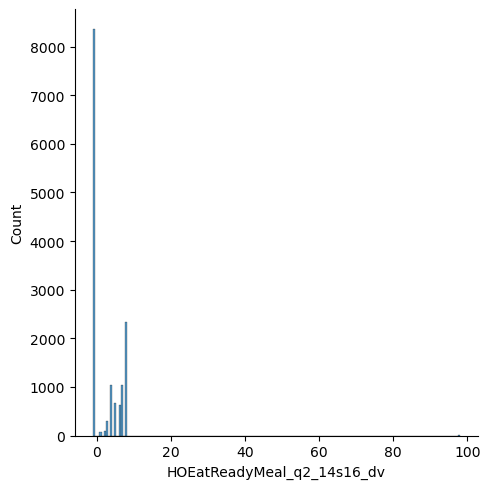

surveyyear  HOEatReadyMeal_q2_14s16_dv
3           -1                            2978
2           -1                            2724
1           -1                            2652
4            8                            1254
5            8                            1091
             4                             534
             7                             531
4            7                             510
             4                             498
5            5                             350
             6                             334
4            5                             317
             6                             297
             3                             163
5            3                             146
             2                              45
4            2                              40
             1                              38
5            1                              37
4            98                              1
5            98      

In [18]:
# check dv distribution
print(df_food['HOEatReadyMeal_q2_14s16_dv'].value_counts())
sns.displot(x='HOEatReadyMeal_q2_14s16_dv', data=df_food)
plt.show()

# dv missing value -1 due to survey year
df_food[['surveyyear','HOEatReadyMeal_q2_14s16_dv']].value_counts()

In [19]:
#check for duplicate values
duplicates = df_food[df_food.duplicated()]
duplicates

,surveyyear,SerialNo,Gender_RespSex,Age_age_dv,country_dv,HouseholdSize_bhhsize2,MaritalStatus_marstat2,HouseholdIncome_hhdinc,ResponsibilityofPrepearingFood_CkRes,HowOftenCookFood_CkFreq,...,chemknow2,chemknow3,chemknow4,chemiop1,chemiop2,chemiop3,chemiop4,KeepingHealthyWeight_h2_47_dv,EatRightAmountCalories_h2_53_dv,TrustInfoOnLabel_Label


## Finding from initial data inspection
- no empty value
- no duplicates
- all variables are categorical, no outliers
- Among the five waves of the survey, waves 123 do not collect any data related to the DV

## Action
- subset the data and exclude data from wave 123, only wave 4 and 5 are usable

In [20]:
# subset the data with only wave 4-5
Food_w45 = df_food[df_food['surveyyear'].isin([4,5])]
Food_w45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   surveyyear                                6187 non-null   int64
 1   SerialNo                                  6187 non-null   int64
 2   Gender_RespSex                            6187 non-null   int64
 3   Age_age_dv                                6187 non-null   int64
 4   country_dv                                6187 non-null   int64
 5   HouseholdSize_bhhsize2                    6187 non-null   int64
 6   MaritalStatus_marstat2                    6187 non-null   int64
 7   HouseholdIncome_hhdinc                    6187 non-null   int64
 8   ResponsibilityofPrepearingFood_CkRes      6187 non-null   int64
 9   HowOftenCookFood_CkFreq                   6187 non-null   int64
 10  Vegan/Vegetarian_dietary                  6187 non-null   int

## Check invalid data
7 variables have more than 50 per cent of invalid data (-1 as not applicable); therefore, they are removed for analysis
1. TooMuchPlasticPackaging_q4_2711_dv
2. ConcernCalorie_Q2_35DV_Ca
3. ConcernAllergie_Q2_35DV_Al 
4. EatInTakeawayOutlet_H2_407
5. HouseholdSize_bhhsize2 
6. KeepingHealthyWeight_h2_47_dv
7. EatRightAmountCalories_h2_53_dv

HouseholdSize_bhhsize2                0.503960
EatInTakeawayOutlet_H2_407            0.839987
ConcernCalorie_Q2_35DV_Ca             0.558267
ConcernAllergie_Q2_35DV_Al            0.558267
TooMuchPlasticPackaging_q4_2711_dv    0.503960
KeepingHealthyWeight_h2_47_dv         0.419751
EatRightAmountCalories_h2_53_dv       0.840310
dtype: float64
TooMuchPlasticPackaging_q4_2711_dv
-1    3118
 1    2775
 2     180
 3     103
-8      11
Name: count, dtype: int64


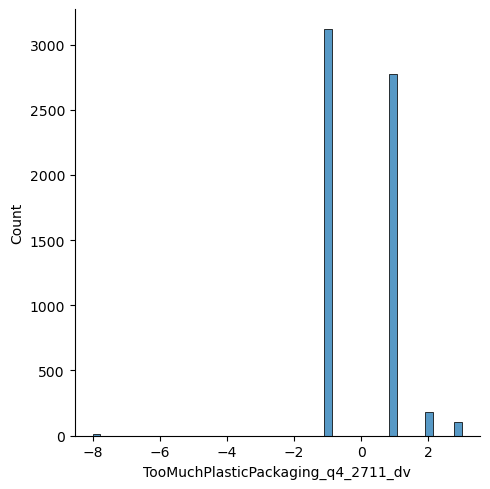

In [21]:
# check variables have -1 value (not applicable value)
invalid_values = [-1]
invalid_counts = Food_w45.isin(invalid_values).mean()
print(invalid_counts[invalid_counts > 0])  # Only show columns with at least one invalid value

### 7 variables have more than 50 percent of missing data, therefore, they are removed for analysis
# TooMuchPlasticPackaging_q4_2711_dv
# ConcernCalorie_Q2_35DV_Ca
# ConcernAllergie_Q2_35DV_Al 
# EatInTakeawayOutlet_H2_407
# HouseholdSize_bhhsize2 
# KeepingHealthyWeight_h2_47_dv
# EatRightAmountCalories_h2_53_dv
print(Food_w45['TooMuchPlasticPackaging_q4_2711_dv'].value_counts())
sns.displot(x='TooMuchPlasticPackaging_q4_2711_dv', data=Food_w45)
plt.show()

### Exclude variables with invalid data over 50%

In [22]:
##### subset data from the Food_w45 exclude iv with with more than 50% NaN value, SerialNo and Surveyyear ####
Food_w45_dropped = Food_w45[['Gender_RespSex', 'Age_age_dv', 'country_dv','MaritalStatus_marstat2',
       'HouseholdIncome_hhdinc', 'ResponsibilityofPrepearingFood_CkRes',
       'HowOftenCookFood_CkFreq', 'Vegan/Vegetarian_dietary',
       'HOEatBeef/Lamb/Pork_q2_14sub_dv', 'HOEatChicken/Turkey_q2_14su4_dv',
       'HOEatDuck/Goose_q2_14su5_dv','HOEatReadyMeal_q2_14s16_dv', 'EatOut1', 'EatOut2', 'EatOut3',
       'EatOut4', 'EatOut5', 'EatOut6', 'EatOut7', 'EatOut8', 'EatOut9',
       'EatOut10', 'EatOut11', 'ResponsibilityForGroceryShopping_Q3_1',
       'GroceryInLargeSupermarket_Q3_31', 'GroceryInMiniMarketQ3_32',
       'GroceryInLocalShop_Q3_33', 'GroceryInGarageForecourt_Q3_34',
       'GroceryInIndieGrocer_Q3_35', 'KitchenAccess_Q4_8a',
       'MicrowaveAccess_Q4_8c8', 'TryNewThingsToEat_q4_276dv','NoTimeCooking_q4_279dv', 'EnjoyCooking_q4_277dv','InformationFromPeople_Q11_8bDV1',
       'InformationFromSchool_Q11_8bDV2', 'InformationFromWork_Q11_8bDV3',
       'InformationFromRetailers_Q11_8bDV4',
       'InformationFromNewspapaer_Q11_8bDV5',
       'InformationFromNewsWebsite_Q11_8bDV6', 'InformationFromTV_Q11_8bDV7',
       'InformationFromMagazine_Q11_8bDV8',
       'InformationFromFoodWebsite_Q11_8bDV9',
       'InformationFromRadioCampaign_Q11_8bDV10',
       'InformationFromBook_Q11_8bDV11',
       'InformationFromInternetSearch_Q11_8bDV12',
       'InformationFromSocialMedia_Q11_8bDV13',
       'InformationFromPackaging_Q11_8bDV14',
       'InformationFromDoctor_Q11_8bDV15', 'chemknow1', 'chemknow2',
       'chemknow3', 'chemknow4', 'chemiop1', 'chemiop2', 'chemiop3',
       'chemiop4','TrustInfoOnLabel_Label']]
Food_w45_dropped.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Gender_RespSex                            6187 non-null   int64
 1   Age_age_dv                                6187 non-null   int64
 2   country_dv                                6187 non-null   int64
 3   MaritalStatus_marstat2                    6187 non-null   int64
 4   HouseholdIncome_hhdinc                    6187 non-null   int64
 5   ResponsibilityofPrepearingFood_CkRes      6187 non-null   int64
 6   HowOftenCookFood_CkFreq                   6187 non-null   int64
 7   Vegan/Vegetarian_dietary                  6187 non-null   int64
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv           6187 non-null   int64
 9   HOEatChicken/Turkey_q2_14su4_dv           6187 non-null   int64
 10  HOEatDuck/Goose_q2_14su5_dv               6187 non-null   int

## Data cleaning for the rest variables

In [23]:
values_replace = [-9,-8,98]
replace_variables = Food_w45_dropped.isin(values_replace).mean()
print(replace_variables[replace_variables > 0])  # Only show columns with at least one invalid value

Age_age_dv                                  0.002101
MaritalStatus_marstat2                      0.001940
HouseholdIncome_hhdinc                      0.229352
ResponsibilityofPrepearingFood_CkRes        0.000162
HOEatBeef/Lamb/Pork_q2_14sub_dv             0.000323
HOEatChicken/Turkey_q2_14su4_dv             0.000162
HOEatDuck/Goose_q2_14su5_dv                 0.000162
HOEatReadyMeal_q2_14s16_dv                  0.000323
ResponsibilityForGroceryShopping_Q3_1       0.000162
GroceryInLargeSupermarket_Q3_31             0.001616
GroceryInMiniMarketQ3_32                    0.001616
GroceryInLocalShop_Q3_33                    0.001616
GroceryInGarageForecourt_Q3_34              0.001616
GroceryInIndieGrocer_Q3_35                  0.001616
KitchenAccess_Q4_8a                         0.000485
MicrowaveAccess_Q4_8c8                      0.000485
TryNewThingsToEat_q4_276dv                  0.000808
NoTimeCooking_q4_279dv                      0.001940
EnjoyCooking_q4_277dv                       0.

In [24]:
# replace values -9,-8,98 with mode
Food_w45_replaced = Food_w45_dropped.copy()

# find colunms
replace_columns = Food_w45_replaced.columns[Food_w45_replaced.isin(values_replace).any()]

# Replace invalid values with mode for each column
for col in replace_columns:
    mode_val = Food_w45_replaced.loc[~Food_w45_replaced[col].isin(values_replace), col].mode()[0]
    Food_w45_replaced.loc[Food_w45_replaced[col].isin(values_replace), col] = mode_val

In [25]:
# check replaced dataframe Food_w45_replaced
replace_variables = Food_w45_replaced.isin(values_replace).mean()
print(replace_variables[replace_variables > 0])  # Only show columns with at least one invalid value

Series([], dtype: float64)


## Summary from data inspection and cleaning
65 variables with 14,541 respondents are reduced to 58 variables with 6187 respondents

# 3. Descriptive Statistics
- Demographic: The data is slightly skewed towards females (59.7%) and older respondents, with the youngest age group (16–24) under-represented (6.7%). Most participants are from England (67.4%), married or cohabiting (55.1%), and belong to lower-to-middle income (£10,400–£25,999: 48.7%). Higher-income households (>£52,000) are less represented (18.1%).
- Respondents' capability in consuming RTE meals:  65.5% of respondents enjoy it, and 66.7% cook daily. However, knowledge about food production processes remains low: most respondents reported not being well-informed about the chemicals that occur in food production.
- Respondents' opportunity to consume RTE meals: most respondents have strong access to food preparation resources and grocery outlets. Over 61% of respondents hold primary responsibility for cooking and grocery shopping, and 94.4% shop in supermarkets. Access to kitchens (94.2%) and microwaves (90.2%) is nearly universal. Barriers to food access and preparation appear minimal.
- Respondents' motivation to consume RTE meals: they broadly accept animal-based foods (96.8%) and willingness to try new foods (67.7%). Meat consumption is high, with more than 70% of respondents eating chicken or turkey and over 55% eating beef, lamb, or pork one to four times a week. Duck and goose are the least consumed, with over 90% eating them rarely or never. Time constraints are not a major barrier, with 72% disagreeing that they lack time to cook.
- DV distribution: 38% never eat ready meals, 17% eat them less than once a month, and only 15% consume them weekly. This distribution, with the fact that the data were collected in 2016 and 2018, suggests that ready meals were not yet a staple food at the time. This aligns with market reports showing that ready-meal revenues only began to grow rapidly from 2019 onward.

## Action
A few variables are theoretically and thematically related. They show redundancy and need dimension reduction.

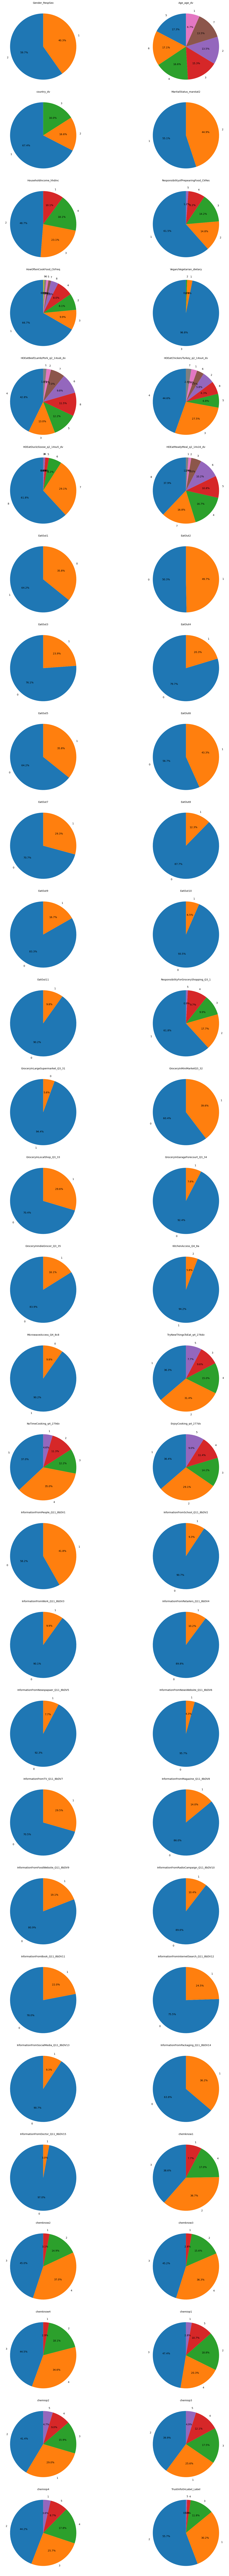

In [26]:
import math
# List of categorical columns (excluding the DV itself)
variables = ['Gender_RespSex', 'Age_age_dv', 'country_dv', 'MaritalStatus_marstat2',
       'HouseholdIncome_hhdinc', 'ResponsibilityofPrepearingFood_CkRes',
       'HowOftenCookFood_CkFreq', 'Vegan/Vegetarian_dietary',
       'HOEatBeef/Lamb/Pork_q2_14sub_dv', 'HOEatChicken/Turkey_q2_14su4_dv',
       'HOEatDuck/Goose_q2_14su5_dv', 'HOEatReadyMeal_q2_14s16_dv', 'EatOut1',
       'EatOut2', 'EatOut3', 'EatOut4', 'EatOut5', 'EatOut6', 'EatOut7',
       'EatOut8', 'EatOut9', 'EatOut10', 'EatOut11',
       'ResponsibilityForGroceryShopping_Q3_1',
       'GroceryInLargeSupermarket_Q3_31', 'GroceryInMiniMarketQ3_32',
       'GroceryInLocalShop_Q3_33', 'GroceryInGarageForecourt_Q3_34',
       'GroceryInIndieGrocer_Q3_35', 'KitchenAccess_Q4_8a',
       'MicrowaveAccess_Q4_8c8', 'TryNewThingsToEat_q4_276dv',
       'NoTimeCooking_q4_279dv', 'EnjoyCooking_q4_277dv',
       'InformationFromPeople_Q11_8bDV1', 'InformationFromSchool_Q11_8bDV2',
       'InformationFromWork_Q11_8bDV3', 'InformationFromRetailers_Q11_8bDV4',
       'InformationFromNewspapaer_Q11_8bDV5',
       'InformationFromNewsWebsite_Q11_8bDV6', 'InformationFromTV_Q11_8bDV7',
       'InformationFromMagazine_Q11_8bDV8',
       'InformationFromFoodWebsite_Q11_8bDV9',
       'InformationFromRadioCampaign_Q11_8bDV10',
       'InformationFromBook_Q11_8bDV11',
       'InformationFromInternetSearch_Q11_8bDV12',
       'InformationFromSocialMedia_Q11_8bDV13',
       'InformationFromPackaging_Q11_8bDV14',
       'InformationFromDoctor_Q11_8bDV15', 'chemknow1', 'chemknow2',
       'chemknow3', 'chemknow4', 'chemiop1', 'chemiop2', 'chemiop3',
       'chemiop4', 'TrustInfoOnLabel_Label']  # Add more if needed

# Set number of charts per row
charts_per_row = 2
total_vars = len(variables)
rows = math.ceil(total_vars / charts_per_row)

# Create subplots
fig, axes = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))
axes = axes.flatten()  # flatten in case of multiple rows

for i, var in enumerate(variables):
    counts = Food_w45_replaced[var].value_counts(dropna=False)
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(var, fontsize=10)

# Hide unused subplots if variables are not a multiple of 4
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
Food_w45_replaced.columns

Index(['Gender_RespSex', 'Age_age_dv', 'country_dv', 'MaritalStatus_marstat2',
       'HouseholdIncome_hhdinc', 'ResponsibilityofPrepearingFood_CkRes',
       'HowOftenCookFood_CkFreq', 'Vegan/Vegetarian_dietary',
       'HOEatBeef/Lamb/Pork_q2_14sub_dv', 'HOEatChicken/Turkey_q2_14su4_dv',
       'HOEatDuck/Goose_q2_14su5_dv', 'HOEatReadyMeal_q2_14s16_dv', 'EatOut1',
       'EatOut2', 'EatOut3', 'EatOut4', 'EatOut5', 'EatOut6', 'EatOut7',
       'EatOut8', 'EatOut9', 'EatOut10', 'EatOut11',
       'ResponsibilityForGroceryShopping_Q3_1',
       'GroceryInLargeSupermarket_Q3_31', 'GroceryInMiniMarketQ3_32',
       'GroceryInLocalShop_Q3_33', 'GroceryInGarageForecourt_Q3_34',
       'GroceryInIndieGrocer_Q3_35', 'KitchenAccess_Q4_8a',
       'MicrowaveAccess_Q4_8c8', 'TryNewThingsToEat_q4_276dv',
       'NoTimeCooking_q4_279dv', 'EnjoyCooking_q4_277dv',
       'InformationFromPeople_Q11_8bDV1', 'InformationFromSchool_Q11_8bDV2',
       'InformationFromWork_Q11_8bDV3', 'InformationFromRet

# 4. Data Preparation for analysis

### Feature engineering: 
1. Eat out (1-11) grouping by mean: New value between 0 and 1, closer to 1 means eat out more frequently.
2. Principal Component Analysis (PCA) for chemknow1-4: The new value is not fixed; the higher the value, the more informed about the chemical knowledge in food.
3. Principal Component Analysis (PCA) for chemiop1-4: The new value is not fixed; higher values reflect a more positive attitude towards chemicals in food.
4. Information sources about how to prepare food are grouped thematically: traditional, digital, and interpersonal. The new value is between 0 and 1, closer to 1 means rely on this source for cooking information.
5. Set DV into binary values and continuous for predictive modelling. 1: high frequent consumer 0: low frequent consumer

In [28]:
# combine eatout_columns as eatout frequency
eatout_columns = [f"EatOut{i}" for i in range(1, 12)]
eatout_columns
Food_w45_replaced = Food_w45_replaced.copy()  # Make it an independent DataFrame
Food_w45_replaced['EatOut_Frequency'] = Food_w45_replaced[eatout_columns].mean(axis=1, skipna=True).round(2)
Food_w45_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 59 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender_RespSex                            6187 non-null   int64  
 1   Age_age_dv                                6187 non-null   int64  
 2   country_dv                                6187 non-null   int64  
 3   MaritalStatus_marstat2                    6187 non-null   int64  
 4   HouseholdIncome_hhdinc                    6187 non-null   int64  
 5   ResponsibilityofPrepearingFood_CkRes      6187 non-null   int64  
 6   HowOftenCookFood_CkFreq                   6187 non-null   int64  
 7   Vegan/Vegetarian_dietary                  6187 non-null   int64  
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv           6187 non-null   int64  
 9   HOEatChicken/Turkey_q2_14su4_dv           6187 non-null   int64  
 10  HOEatDuck/Goose_q2_14su5_dv          

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# run PCA for chemknow1-4
# Define all chem_know variables
chem_know = [
    'chemknow1', 'chemknow2', 'chemknow3', 'chemknow4',
]

# Drop rows with missing values
chem_know_data = Food_w45_replaced[chem_know].dropna()

# Standardise
scaler = StandardScaler()
chem_all_scaled1 = scaler.fit_transform(chem_know_data)

# Run PCA (you can increase n_components if you want more)
pca = PCA(n_components=2)
chem_know_pca = pca.fit_transform(chem_all_scaled1)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.67340848 0.13765949]


In [30]:
# Create a new column for PC1 in the cleaned dataset
Food_w45_replaced.loc[chem_know_data.index, 'PC1_ChemKnowledge'] = -chem_know_pca[:, 0] # - higher value means more informed about the chemknow

# Display the first few values
print(Food_w45_replaced[['PC1_ChemKnowledge']].min())

PC1_ChemKnowledge   -2.415425
dtype: float64


In [31]:
# run PCA for chemiop1-4
# Define all chem_op variables
chem_op = [
    'chemiop1', 'chemiop2', 'chemiop3', 'chemiop4',
]

# Drop rows with missing values
chem_op_data = Food_w45_replaced[chem_op].dropna()

# Standardise
scaler = StandardScaler()
chem_all_scaled2 = scaler.fit_transform(chem_op_data)

# Run PCA (you can increase n_components if you want more)
pca = PCA(n_components=2)
chem_op_pca = pca.fit_transform(chem_all_scaled2)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.48521411 0.24008699]


In [32]:
# Create a new column for PC1 in your cleaned dataset
Food_w45_replaced.loc[chem_op_data.index, 'PC1_ChemOpinion'] = -chem_op_pca[:, 0] # - higher value means more stonger agreement
Food_w45_replaced.loc[chem_op_data.index, 'PC2_ChemOpinion'] = -chem_op_pca[:, 1] # - higher value means more stonger agreement
# Display the first few values
print(Food_w45_replaced[['PC1_ChemOpinion','PC2_ChemOpinion']].head())

      PC1_ChemOpinion  PC2_ChemOpinion
8354        -0.295492         1.761998
8355        -0.240269         0.710077
8356        -3.580922         0.543358
8357         0.729905        -0.320946
8358         0.222323         0.222328


In [33]:
Food_w45_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 62 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender_RespSex                            6187 non-null   int64  
 1   Age_age_dv                                6187 non-null   int64  
 2   country_dv                                6187 non-null   int64  
 3   MaritalStatus_marstat2                    6187 non-null   int64  
 4   HouseholdIncome_hhdinc                    6187 non-null   int64  
 5   ResponsibilityofPrepearingFood_CkRes      6187 non-null   int64  
 6   HowOftenCookFood_CkFreq                   6187 non-null   int64  
 7   Vegan/Vegetarian_dietary                  6187 non-null   int64  
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv           6187 non-null   int64  
 9   HOEatChicken/Turkey_q2_14su4_dv           6187 non-null   int64  
 10  HOEatDuck/Goose_q2_14su5_dv          

In [34]:
# Grouping variables information source value, higher values = higher likelyhood to use that source for info
info_traditional = [
    'InformationFromNewspapaer_Q11_8bDV5',
    'InformationFromTV_Q11_8bDV7',
    'InformationFromMagazine_Q11_8bDV8',
    'InformationFromRadioCampaign_Q11_8bDV10',
    'InformationFromBook_Q11_8bDV11',
    'InformationFromPackaging_Q11_8bDV14'  
]

info_digital = [
    'InformationFromNewsWebsite_Q11_8bDV6',
    'InformationFromFoodWebsite_Q11_8bDV9',
    'InformationFromInternetSearch_Q11_8bDV12',
    'InformationFromSocialMedia_Q11_8bDV13'
]

info_interpersonal = [
    'InformationFromPeople_Q11_8bDV1',
    'InformationFromSchool_Q11_8bDV2',
    'InformationFromWork_Q11_8bDV3',
    'InformationFromRetailers_Q11_8bDV4',
    'InformationFromDoctor_Q11_8bDV15'
]

# Compute average scores
Food_w45_replaced['Info_Traditional'] = Food_w45_replaced[info_traditional].mean(axis=1).round(2)
Food_w45_replaced['Info_Digital'] = Food_w45_replaced[info_digital].mean(axis=1).round(2)
Food_w45_replaced['Info_Interpersonal'] = Food_w45_replaced[info_interpersonal].mean(axis=1).round(2)

# Optional: View the new columns
Food_w45_replaced[['Info_Traditional', 'Info_Digital', 'Info_Interpersonal']].head(5)

,Info_Traditional,Info_Digital,Info_Interpersonal
8354,0.50,0.25,0.4
8355,0.67,0.25,0.2
8356,0.17,0.00,0.0
8357,0.17,0.00,0.2
8358,0.33,0.25,0.2


HOEatReadyMeal_q2_14s16_dv
8    0.379344
7    0.168256
4    0.166801
5    0.107807
6    0.101988
3    0.049943
2    0.013738
1    0.012122
Name: proportion, dtype: float64


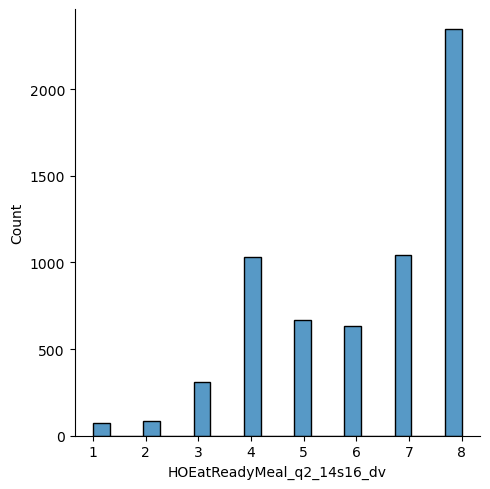

In [35]:
# dv distribution, 1-7 more or less eat ready meal, 8 never eat ready meal
print(Food_w45_replaced['HOEatReadyMeal_q2_14s16_dv'].value_counts(normalize=True))
sns.displot(x='HOEatReadyMeal_q2_14s16_dv', data=Food_w45_replaced)
plt.show()

## DV preparation
- binary for logistic regression model
- continuous for pososion/negative binomial regression model

In [36]:
# trasnfer the dv into binary for predictive modeling (1-4 high frequent buyers, 5-8 low frequent buyers)
Food_w45_replaced['RTF_Binary'] = Food_w45_replaced['HOEatReadyMeal_q2_14s16_dv'].apply(lambda x: 1 if x in [1,2,3,4] else 0)

In [37]:
# trasnfer the dv into count of times in a year that customer would buy RTF
# Define the mapping from response codes to estimated yearly counts
rtf_yearly_mapping = {
    1: 365, # At least once a day	365
    2: 286, # 5-6 times a week	286 (5.5 × 52)
    3: 182, # 3-4 times a week	182 (3.5 × 52)
    4: 78, # Once or twice a week	78 (1.5 × 52)
    5: 26, # Once a fortnight	26
    6: 12, # Once a month	12
    7: 6, # Less than once a month	6
    8: 0 # Never 0
}

# Apply the mapping to create a new column
Food_w45_replaced['RTF_Yearly_Count'] = Food_w45_replaced['HOEatReadyMeal_q2_14s16_dv'].map(rtf_yearly_mapping)

RTF_Binary
0    4686
1    1501
Name: count, dtype: int64


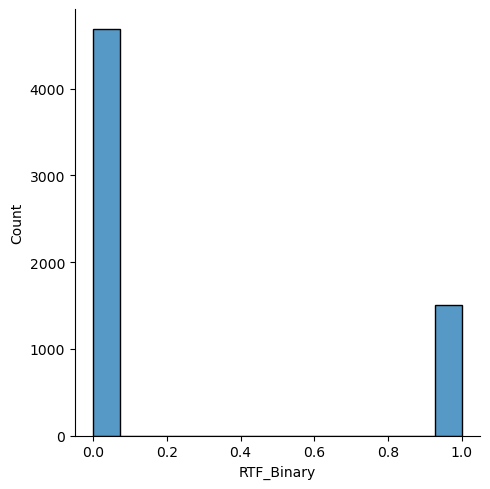

In [38]:
### After initial data cleaning, select the columns for analysis as Food_cleaned
Food_w45_replaced.head()

# dv distribution, 1-7 more or less eat ready meal, 8 never eat ready meal
print(Food_w45_replaced['RTF_Binary'].value_counts())
sns.displot(x='RTF_Binary', data=Food_w45_replaced)
plt.show()

In [39]:
# data set for the analysis Food_cleaned
Food_cleaned = Food_w45_replaced[['Gender_RespSex', 'Age_age_dv', 'country_dv',
       'MaritalStatus_marstat2', 'HouseholdIncome_hhdinc',
       'ResponsibilityofPrepearingFood_CkRes', 'HowOftenCookFood_CkFreq',
       'Vegan/Vegetarian_dietary', 'HOEatBeef/Lamb/Pork_q2_14sub_dv',
       'HOEatChicken/Turkey_q2_14su4_dv', 'HOEatDuck/Goose_q2_14su5_dv',
       'ResponsibilityForGroceryShopping_Q3_1',
       'GroceryInLargeSupermarket_Q3_31', 'GroceryInMiniMarketQ3_32',
       'GroceryInLocalShop_Q3_33', 'GroceryInGarageForecourt_Q3_34',
       'GroceryInIndieGrocer_Q3_35', 'KitchenAccess_Q4_8a',
       'MicrowaveAccess_Q4_8c8', 'TryNewThingsToEat_q4_276dv','EnjoyCooking_q4_277dv','NoTimeCooking_q4_279dv',
        'EatOut_Frequency', 'PC1_ChemKnowledge', 'PC1_ChemOpinion','PC2_ChemOpinion','TrustInfoOnLabel_Label',
       'Info_Traditional', 'Info_Digital', 'Info_Interpersonal', 'RTF_Binary','RTF_Yearly_Count']]

Food_cleaned.head()

,Gender_RespSex,Age_age_dv,country_dv,MaritalStatus_marstat2,HouseholdIncome_hhdinc,ResponsibilityofPrepearingFood_CkRes,HowOftenCookFood_CkFreq,Vegan/Vegetarian_dietary,HOEatBeef/Lamb/Pork_q2_14sub_dv,HOEatChicken/Turkey_q2_14su4_dv,...,EatOut_Frequency,PC1_ChemKnowledge,PC1_ChemOpinion,PC2_ChemOpinion,TrustInfoOnLabel_Label,Info_Traditional,Info_Digital,Info_Interpersonal,RTF_Binary,RTF_Yearly_Count
8354,2,3,1,1,2,1,2,3,4,3,...,0.18,-0.027440,-0.295492,1.761998,2,0.50,0.25,0.4,0,12
8355,1,4,1,1,4,4,4,3,4,3,...,0.45,-0.561196,-0.240269,0.710077,2,0.67,0.25,0.2,1,78
8356,1,7,2,1,4,4,7,3,3,3,...,0.27,1.167115,-3.580922,0.543358,2,0.17,0.00,0.0,0,12
8357,1,3,1,2,1,1,1,3,8,5,...,0.18,0.534894,0.729905,-0.320946,2,0.17,0.00,0.2,1,182
8358,2,2,3,2,2,2,1,3,6,3,...,0.36,1.274356,0.222323,0.222328,2,0.33,0.25,0.2,0,0


In [40]:
Food_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_RespSex                         6187 non-null   int64  
 1   Age_age_dv                             6187 non-null   int64  
 2   country_dv                             6187 non-null   int64  
 3   MaritalStatus_marstat2                 6187 non-null   int64  
 4   HouseholdIncome_hhdinc                 6187 non-null   int64  
 5   ResponsibilityofPrepearingFood_CkRes   6187 non-null   int64  
 6   HowOftenCookFood_CkFreq                6187 non-null   int64  
 7   Vegan/Vegetarian_dietary               6187 non-null   int64  
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv        6187 non-null   int64  
 9   HOEatChicken/Turkey_q2_14su4_dv        6187 non-null   int64  
 10  HOEatDuck/Goose_q2_14su5_dv            6187 non-null   int64  
 11  Respo

## Data preparation summary
58 variables are reduced to 31 variables for the diagostic analysis in the next stage

# 5. Diagnostic analysis

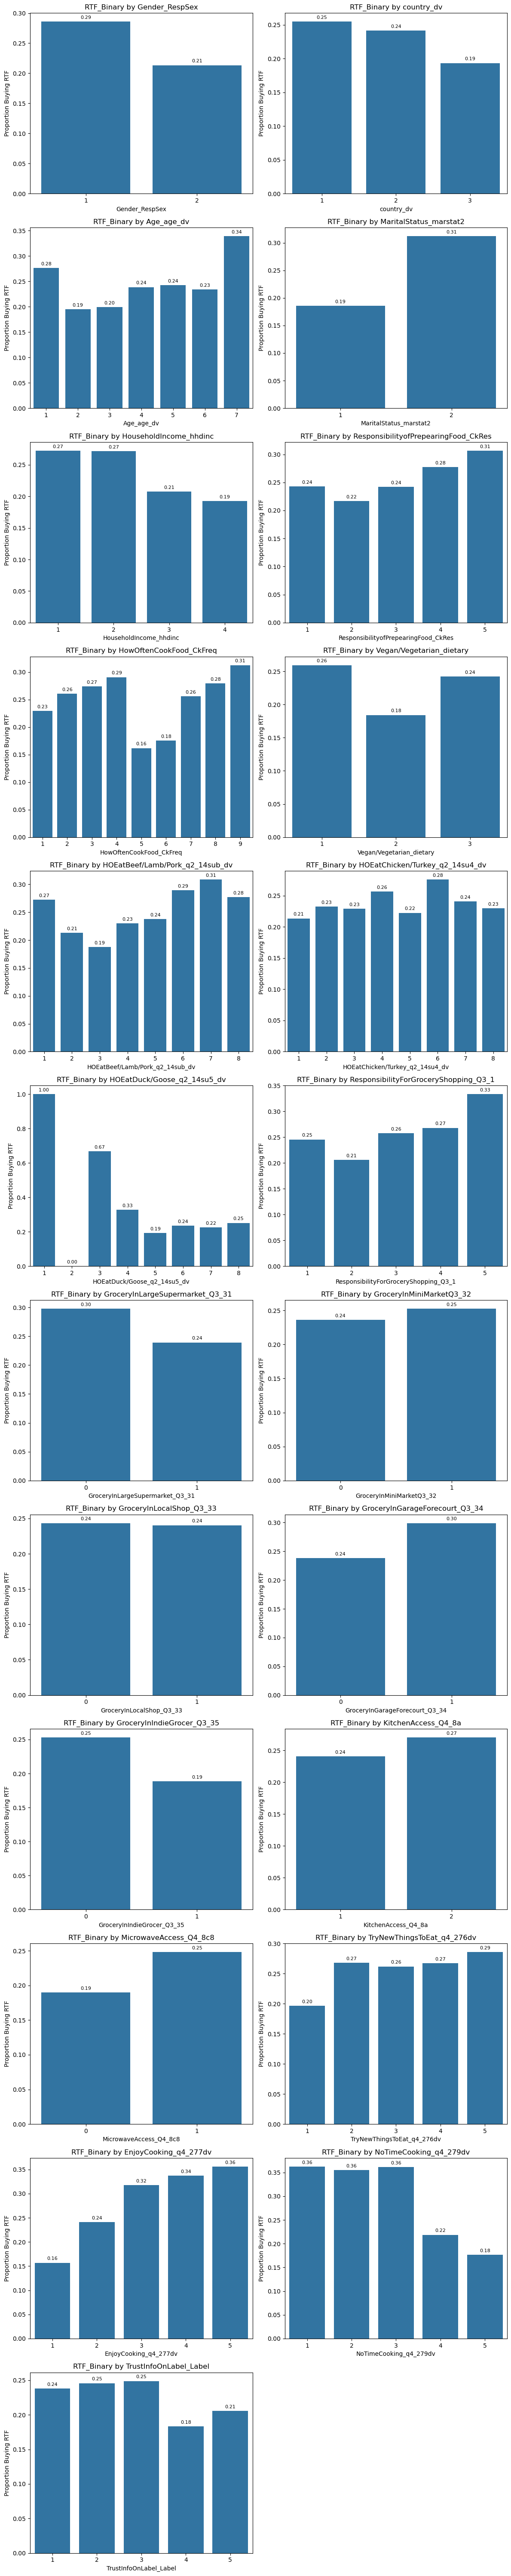

In [41]:
# viz the categorical variables with DV for diagnostic analysis
# List of categorical columns (excluding the DV itself)
categorical_cols = ['Gender_RespSex', 'country_dv', 'Age_age_dv','MaritalStatus_marstat2', 
                    'HouseholdIncome_hhdinc', 'ResponsibilityofPrepearingFood_CkRes','HowOftenCookFood_CkFreq','Vegan/Vegetarian_dietary',
                    'HOEatBeef/Lamb/Pork_q2_14sub_dv','HOEatChicken/Turkey_q2_14su4_dv','HOEatDuck/Goose_q2_14su5_dv',
                    'ResponsibilityForGroceryShopping_Q3_1','GroceryInLargeSupermarket_Q3_31','GroceryInMiniMarketQ3_32','GroceryInLocalShop_Q3_33',
                    'GroceryInGarageForecourt_Q3_34','GroceryInIndieGrocer_Q3_35','KitchenAccess_Q4_8a','MicrowaveAccess_Q4_8c8',
                    'TryNewThingsToEat_q4_276dv','EnjoyCooking_q4_277dv','NoTimeCooking_q4_279dv','TrustInfoOnLabel_Label']  # Add more if needed

# Set up subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

# Loop categorical colunms
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.barplot(x=col, y='RTF_Binary', data=Food_cleaned, ax=axes[i], errorbar=None)
    axes[i].set_title(f'RTF_Binary by {col}')
    axes[i].set_ylabel('Proportion Buying RTF')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x')

# Annotate values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
Food_cleaned.columns

Index(['Gender_RespSex', 'Age_age_dv', 'country_dv', 'MaritalStatus_marstat2',
       'HouseholdIncome_hhdinc', 'ResponsibilityofPrepearingFood_CkRes',
       'HowOftenCookFood_CkFreq', 'Vegan/Vegetarian_dietary',
       'HOEatBeef/Lamb/Pork_q2_14sub_dv', 'HOEatChicken/Turkey_q2_14su4_dv',
       'HOEatDuck/Goose_q2_14su5_dv', 'ResponsibilityForGroceryShopping_Q3_1',
       'GroceryInLargeSupermarket_Q3_31', 'GroceryInMiniMarketQ3_32',
       'GroceryInLocalShop_Q3_33', 'GroceryInGarageForecourt_Q3_34',
       'GroceryInIndieGrocer_Q3_35', 'KitchenAccess_Q4_8a',
       'MicrowaveAccess_Q4_8c8', 'TryNewThingsToEat_q4_276dv',
       'EnjoyCooking_q4_277dv', 'NoTimeCooking_q4_279dv', 'EatOut_Frequency',
       'PC1_ChemKnowledge', 'PC1_ChemOpinion', 'PC2_ChemOpinion',
       'TrustInfoOnLabel_Label', 'Info_Traditional', 'Info_Digital',
       'Info_Interpersonal', 'RTF_Binary', 'RTF_Yearly_Count'],
      dtype='object')

### Diagnostic findings
- from Chi-square test: 7 variables have p-value > .05
1. ResponsibilityofPrepearingFood_CkRes
2. Vegan/Vegetarian_dietary
3. HOEatChicken/Turkey_q2_14su4_dv (only retain this as it is highly relevant to the oriental flavoured meals)
4. GroceryInMinniMarketQ3_32
5. GroceryInLocalShop_Q3_33
6. KitchenAccess_Q4_8a
7. TrustInfoOnLabel_Label

- from pairwise chi-square test: variables with more than two categories are grouped due to similar effect on DV
1. age 4 groups
2. income 3 groups
3. HO cookfood, eat beef, chicken, duck (p>.05, manually group by values)
4. ResponsibilityForGrocery Shopping_Q3_1
5. TryNewThingsToEat_q4 _276dv
6. EnjoyCooking_q4_277dv
7. NoTimeCooking_q4_279 dv
Following are not used in predictive modelling due to high p- valu
9. ResponsibilityofPrepeari ngFood_CkRes
10. Vegan/Vegetarian_dietary
11. GroceryInMinniMarketQ3 _32
12. GroceryInLocalShop_Q3 _33
13. KitchenAccess_Q4_8a
14. TrustInfoOnLabel_Label

In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table between Gender_RespSex and RTF_Binary
contingency_table = pd.crosstab(Food_cleaned['TrustInfoOnLabel_Label'], Food_cleaned['RTF_Binary'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)


Contingency Table:
 RTF_Binary                 0    1
TrustInfoOnLabel_Label           
1                       1423  445
2                       2601  848
3                        546  181
4                         89   20
5                         27    7

Chi-square Statistic: 2.878132861437767
Degrees of Freedom: 4
P-value: 0.5784222880026051
Expected Frequencies:
 [[1414.81299499  453.18700501]
 [2612.25375788  836.74624212]
 [ 550.62582835  176.37417165]
 [  82.55600453   26.44399547]
 [  25.75141426    8.24858574]]


In [40]:
from itertools import combinations
from scipy.stats import chi2_contingency
import pandas as pd

# Subset relevant columns and drop missing
df = Food_cleaned[['TrustInfoOnLabel_Label', 'RTF_Binary']].dropna()

# Store results
results = []

# Unique income levels
income_levels = sorted(df['TrustInfoOnLabel_Label'].unique())

# Pairwise Chi-square tests
for pair in combinations(income_levels, 2):
    subset = df[df['TrustInfoOnLabel_Label'].isin(pair)]
    contingency = pd.crosstab(subset['TrustInfoOnLabel_Label'], subset['RTF_Binary'])
    chi2, p, _, _ = chi2_contingency(contingency)
    results.append({
        'Group 1': pair[0],
        'Group 2': pair[1],
        'p-value': p
    })

# Create DataFrame
posthoc_df = pd.DataFrame(results)

# Apply Bonferroni correction
posthoc_df['p-value (Bonferroni)'] = posthoc_df['p-value'] * len(posthoc_df)
posthoc_df['Significant (p<.05)'] = posthoc_df['p-value (Bonferroni)'] < 0.05

# Show the results
print(posthoc_df.sort_values(by='p-value'))


   Group 1  Group 2   p-value  p-value (Bonferroni)  Significant (p<.05)
5        2        4  0.167638              1.676384                False
7        3        4  0.170169              1.701686                False
2        1        4  0.232651              2.326511                False
0        1        2  0.557274              5.572740                False
1        1        3  0.600634              6.006339                False
8        3        5  0.714414              7.144143                False
6        2        5  0.734698              7.346985                False
3        1        5  0.813606              8.136065                False
4        2        3  0.897416              8.974161                False
9        4        5  0.967802              9.678023                False


In [41]:
# rename variables values as Food_Final
Food_Final = Food_cleaned.copy()

# Define all value-to-label mappings
value_mappings = {
    'Gender_RespSex': {
        1: 'Male',
        2: 'Female'
    },
    'Age_age_dv': {
        1: 'Emerging(<24)',
        2: 'Young(25-44)',
        3: 'Young(25-44)',
        4: 'Mature(45-74)',
        5: 'Mature(45-74)',
        6: 'Mature(45-74)',
        7: 'Senior(>75)'
    },
    'country_dv': {
        1: 'England',
        2: 'Wales',
        3: 'Northern Ireland'
    },
    'MaritalStatus_marstat2': {
        1: 'With Partner',
        2: 'Single'
    },
    'HouseholdIncome_hhdinc': {
        1: 'Low Income (<£25,999)',
        2: 'Low Income (<£25,999)',
        3: 'Mid-to-High Income (≥£25,999)',
        4: 'Mid-to-High Income (≥£25,999)'
    },
    'ResponsibilityofPrepearingFood_CkRes': {
        1: 'Main/Share',
        2: 'Main/Share',
        3: 'Main/Share',
        4: 'No/Own',
        5: 'No/Own'
    },
    'HowOftenCookFood_CkFreq': {
        1: 'Frequent',
        2: 'Frequent',
        3: 'Frequent',
        4: 'Frequent',
        5: 'Infrequent',
        6: 'Infrequent',
        7: 'Infrequent',
        8: 'Infrequent',
        9: 'It varies'
    },
    'Vegan/Vegetarian_dietary': {
        1: 'Vegetarian/Vegan',
        2: 'Vegetarian/Vegan',
        3: 'Not vegetarian/vegan'
    },
    'HOEatBeef/Lamb/Pork_q2_14sub_dv': {
        1: 'Frequent',
        2: 'Frequent',
        3: 'Frequent',
        4: 'Frequent',
        5: 'Infrequent',
        6: 'Infrequent',
        7: 'Infrequent',
        8: 'Infrequent'
    },
    'HOEatChicken/Turkey_q2_14su4_dv': {
        1: 'Frequent',
        2: 'Frequent',
        3: 'Frequent',
        4: 'Frequent',
        5: 'Infrequent',
        6: 'Infrequent',
        7: 'Infrequent',
        8: 'Infrequent'
    },
    'HOEatDuck/Goose_q2_14su5_dv': {
        1: 'Frequent',
        2: 'Frequent',
        3: 'Frequent',
        4: 'Frequent',
        5: 'Infrequent',
        6: 'Infrequent',
        7: 'Infrequent',
        8: 'Infrequent'
    },
    'ResponsibilityForGroceryShopping_Q3_1': {
        1: 'Primary/Shared',
        2: 'Primary/Shared',
        3: 'Less than half',
        4: 'No/Own',
        5: 'No/Own'
    },
    'GroceryInLargeSupermarket_Q3_31': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'GroceryInMiniMarketQ3_32': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'GroceryInLocalShop_Q3_33': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'GroceryInGarageForecourt_Q3_34': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'GroceryInIndieGrocer_Q3_35': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'KitchenAccess_Q4_8a': {
        1: 'Yes',
        2: 'No'
    },
    'MicrowaveAccess_Q4_8c8': {
        0: 'Not mentioned',
        1: 'Mentioned'
    },
    'TryNewThingsToEat_q4_276dv': {
        1: 'Totally agree',
        2: 'Less agree',
        3: 'Less agree',
        4: 'Less agree',
        5: 'Less agree'
    },
    'EnjoyCooking_q4_277dv':{
        1: 'Totally agree',
        2: 'Agree',
        3: 'Uncertain/Disagree',
        4: 'Uncertain/Disagree',
        5: 'Uncertain/Disagree' 
    },
    'NoTimeCooking_q4_279dv':{
        1: 'Agree/Uncertain',
        2: 'Agree/Uncertain',
        3: 'Agree/Uncertain',
        4: 'Disagree',
        5: 'Totally disagree'
    },
    'TrustInfoOnLabel_Label':{
        1: 'Always',
        2: 'Most of the time',
        3: 'Some of the time',
        4: 'Rarely',
        5: 'Never'
    }
}

# Apply mappings to Food_Final
for column, mapping in value_mappings.items():
    if column in Food_Final.columns:
        # Only convert columns you're replacing to object first
        Food_Final[column] = Food_Final[column].astype('object').replace(mapping)

Food_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_RespSex                         6187 non-null   object 
 1   Age_age_dv                             6187 non-null   object 
 2   country_dv                             6187 non-null   object 
 3   MaritalStatus_marstat2                 6187 non-null   object 
 4   HouseholdIncome_hhdinc                 6187 non-null   object 
 5   ResponsibilityofPrepearingFood_CkRes   6187 non-null   object 
 6   HowOftenCookFood_CkFreq                6187 non-null   object 
 7   Vegan/Vegetarian_dietary               6187 non-null   object 
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv        6187 non-null   object 
 9   HOEatChicken/Turkey_q2_14su4_dv        6187 non-null   object 
 10  HOEatDuck/Goose_q2_14su5_dv            6187 non-null   object 
 11  Respo

In [42]:
Food_Final.describe()

,EatOut_Frequency,PC1_ChemKnowledge,PC1_ChemOpinion,PC2_ChemOpinion,Info_Traditional,Info_Digital,Info_Interpersonal,RTF_Binary,RTF_Yearly_Count
count,6187.000000,6.187000e+03,6.187000e+03,6.187000e+03,6187.000000,6187.00000,6187.000000,6187.000000,6187.000000
mean,0.281910,-1.378134e-17,6.546135e-17,5.512535e-17,0.200021,0.14284,0.148149,0.242605,35.490383
std,0.181464,1.641362e+00,1.393259e+00,9.800527e-01,0.220665,0.21896,0.171529,0.428693,65.135374
min,0.090000,-2.415425e+00,-4.512370e+00,-4.451246e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.090000,-1.230771e+00,-7.478510e-01,-6.481811e-01,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.270000,7.980209e-02,-2.180415e-01,6.181280e-02,0.170000,0.00000,0.200000,0.000000,6.000000
75%,0.360000,7.394772e-01,7.464021e-01,7.100775e-01,0.330000,0.25000,0.200000,0.000000,26.000000
max,0.910000,5.070257e+00,3.094119e+00,3.154884e+00,1.000000,1.00000,1.000000,1.000000,365.000000


## Descriptive and Diagnostic analysis viz
Dashboard on Tableau: https://public.tableau.com/app/profile/xiwen.yang7821/viz/Opendata_17544296313280/Dashboard4

## Discussion from the viz
- **Demographics**: the high RTE meals consumption is notably observed among the senior age group (>75), similar to the trend in the current market as observed by Randall (2025). Moreover, respondents who are male, single, and have a lower income have a higher likelihood of consuming RTE meals.
- **Capability**: respondents who do not express strong enjoyment of cooking are more likely to consume RTE meals, reinforcing the notion that a lack of cooking motivations drives reliance on RTE food (Peltner and Thiele, 2017). Interestingly, people have an irregular cooking routine show the highest RTE consumption (31.25%), suggesting inconsistent cooking habits may prompt higher RTE reliance. The box plot suggests that people with lower concern about chemicals or more positive attitudes are slightly more likely to consume RTE meals, though the difference appears subtle.
- **Opportunity**: fewer people purchase RTE meals at independent grocers because the availability may be limited. One notable contradiction emerges in supermarket shopping. While market research indicates that supermarkets are the primary distribution channel for RTE meals, this data set shows that respondents who mention shopping at supermarkets report lower average RTE consumption. This unexpected finding suggests that simply shopping at supermarkets does not equate to purchasing RTE meals, especially when broader grocery options are available. It may also indicate that high-frequency RTE consumers tend to rely more on alternative, ultra-convenient sources (such as garage forecourts), where consumers lack access to broader food options and quick grab-and-go is the focus. Those who report having less responsibility for grocery shopping for the household tend to consume more RTE meals, which could be due to a lower control over meal planning for others. Microwave access is positively associated with higher RTE consumption, as expected.
- **Motivation**: people who have less time to cook buy RTE meals more, aligning with the convenience factors discussed in the literature (Gürce and Friedman, 2020). Interestingly, those who are less inclined to try new things exhibit slightly higher RTE consumption, suggesting a preference for familiar, predictable meals. This presents a potential barrier to market entry for companies introducing oriental-flavoured RTE meals, as novelty in taste may not align with current high-frequency consumers. Meat consumption patterns further support this point. High-frequency RTE meal consumers are more likely to eat duck or goose, but less likely to eat beef, lamb or pork. For oriental-flavoured products (possibly featuring duck or chicken with spiced sauces), it presents both opportunities and challenges. These ingredients may attract consumers familiar with Asian-inspired meals but deter those hesitant about bold flavours, unfamiliar spices, or less commonly consumed proteins. Therefore, carefully positioning products as approachable and familiar is important. Furthermore, the data shows that those who rely more on digital or interpersonal sources for cooking information tend to consume RTE meals less frequently. This could indicate that these consumers are more engaged in cooking, actively seeking recipes or nutritional knowledge, and thus are less reliant on ready-made solutions. For a new brand entering the market, this suggests that the marketing channel and message should be carefully designed for targeted groups. Eating out frequency shows a subtle difference in consuming RTE meals, suggesting that RTE meals may serve a different functional role than dining out in this data set.
## Variables summary for predictive modelling and cluster analysis
- for predictive modelling: 25 variables (17 categorical, 7 numerical variables and 1 binary DV) are used in the initial predictive modelling
- for cluster analysis: 31 variables are used, but 5 demographic variables are exlcuded

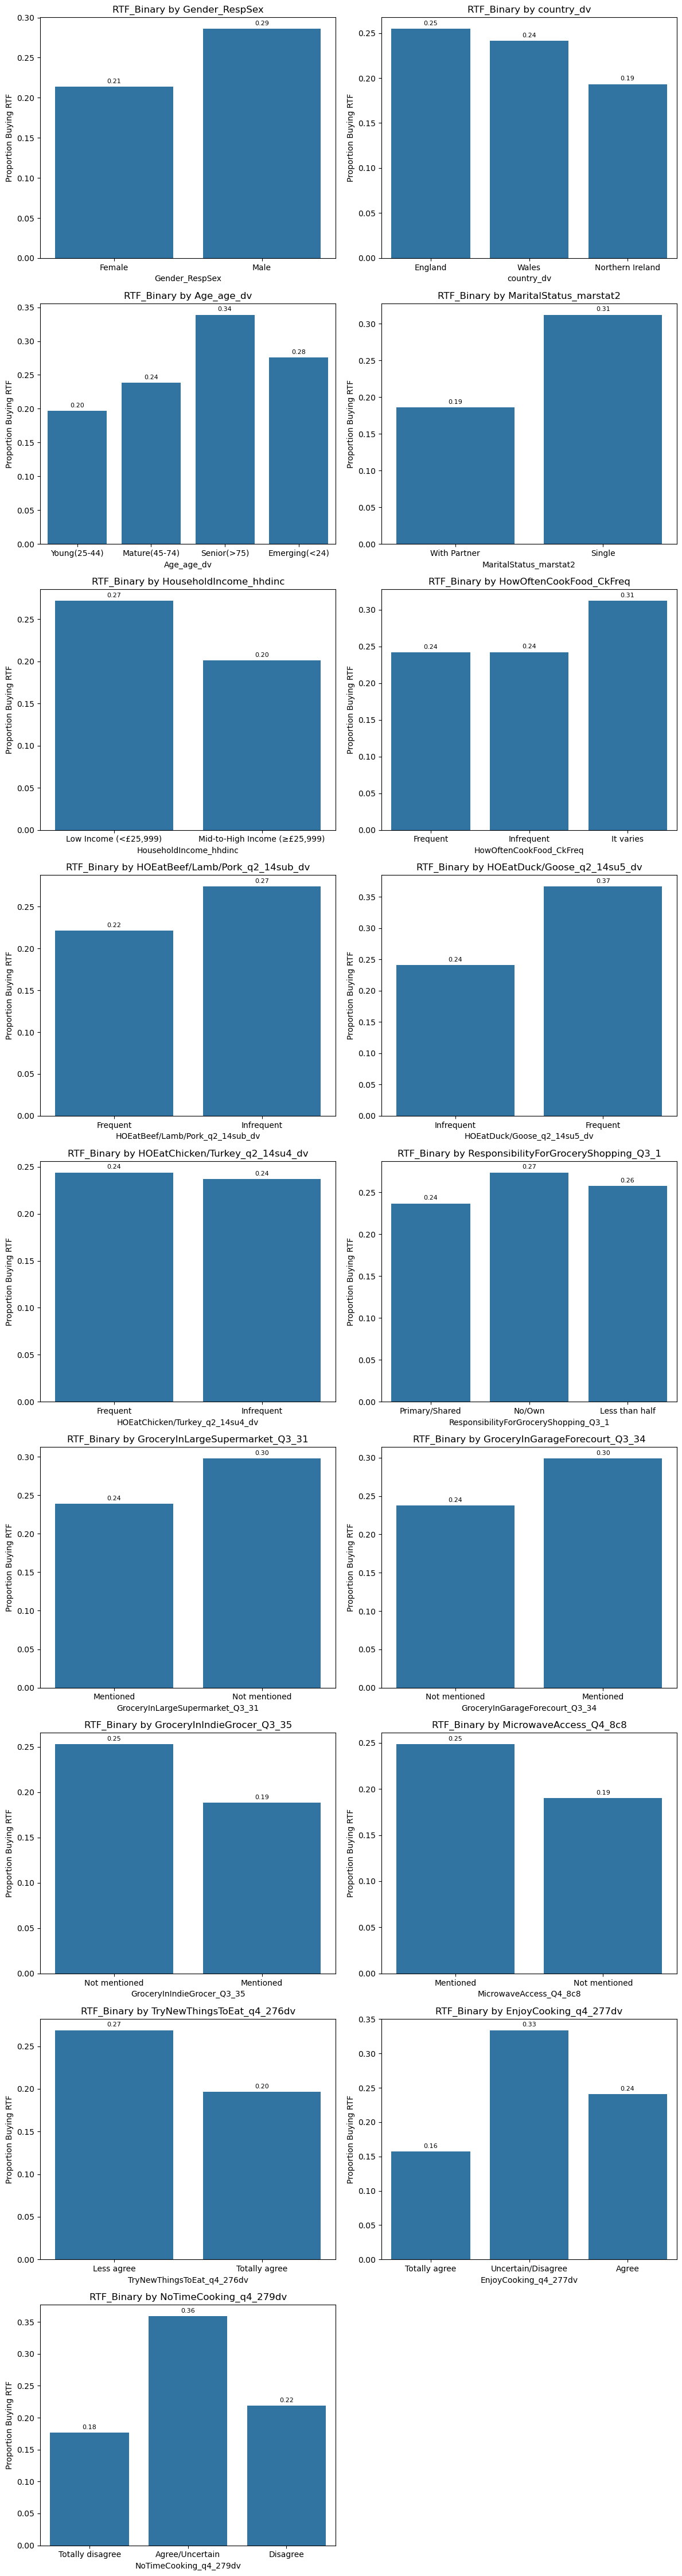

In [43]:
# Viz List of categorical columns (excluding the DV itself)
categorical_cols = ['Gender_RespSex', 'country_dv', 'Age_age_dv','MaritalStatus_marstat2',
                    'HouseholdIncome_hhdinc','HowOftenCookFood_CkFreq',
                    'HOEatBeef/Lamb/Pork_q2_14sub_dv','HOEatDuck/Goose_q2_14su5_dv','HOEatChicken/Turkey_q2_14su4_dv',
                    'ResponsibilityForGroceryShopping_Q3_1','GroceryInLargeSupermarket_Q3_31',
                    'GroceryInGarageForecourt_Q3_34','GroceryInIndieGrocer_Q3_35','MicrowaveAccess_Q4_8c8',
                    'TryNewThingsToEat_q4_276dv','EnjoyCooking_q4_277dv','NoTimeCooking_q4_279dv']  # Add more if needed

# Set up subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

# Loop categorical colunms
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.barplot(x=col, y='RTF_Binary', data=Food_Final, ax=axes[i], errorbar=None)
    axes[i].set_title(f'RTF_Binary by {col}')
    axes[i].set_ylabel('Proportion Buying RTF')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x')

# Annotate values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

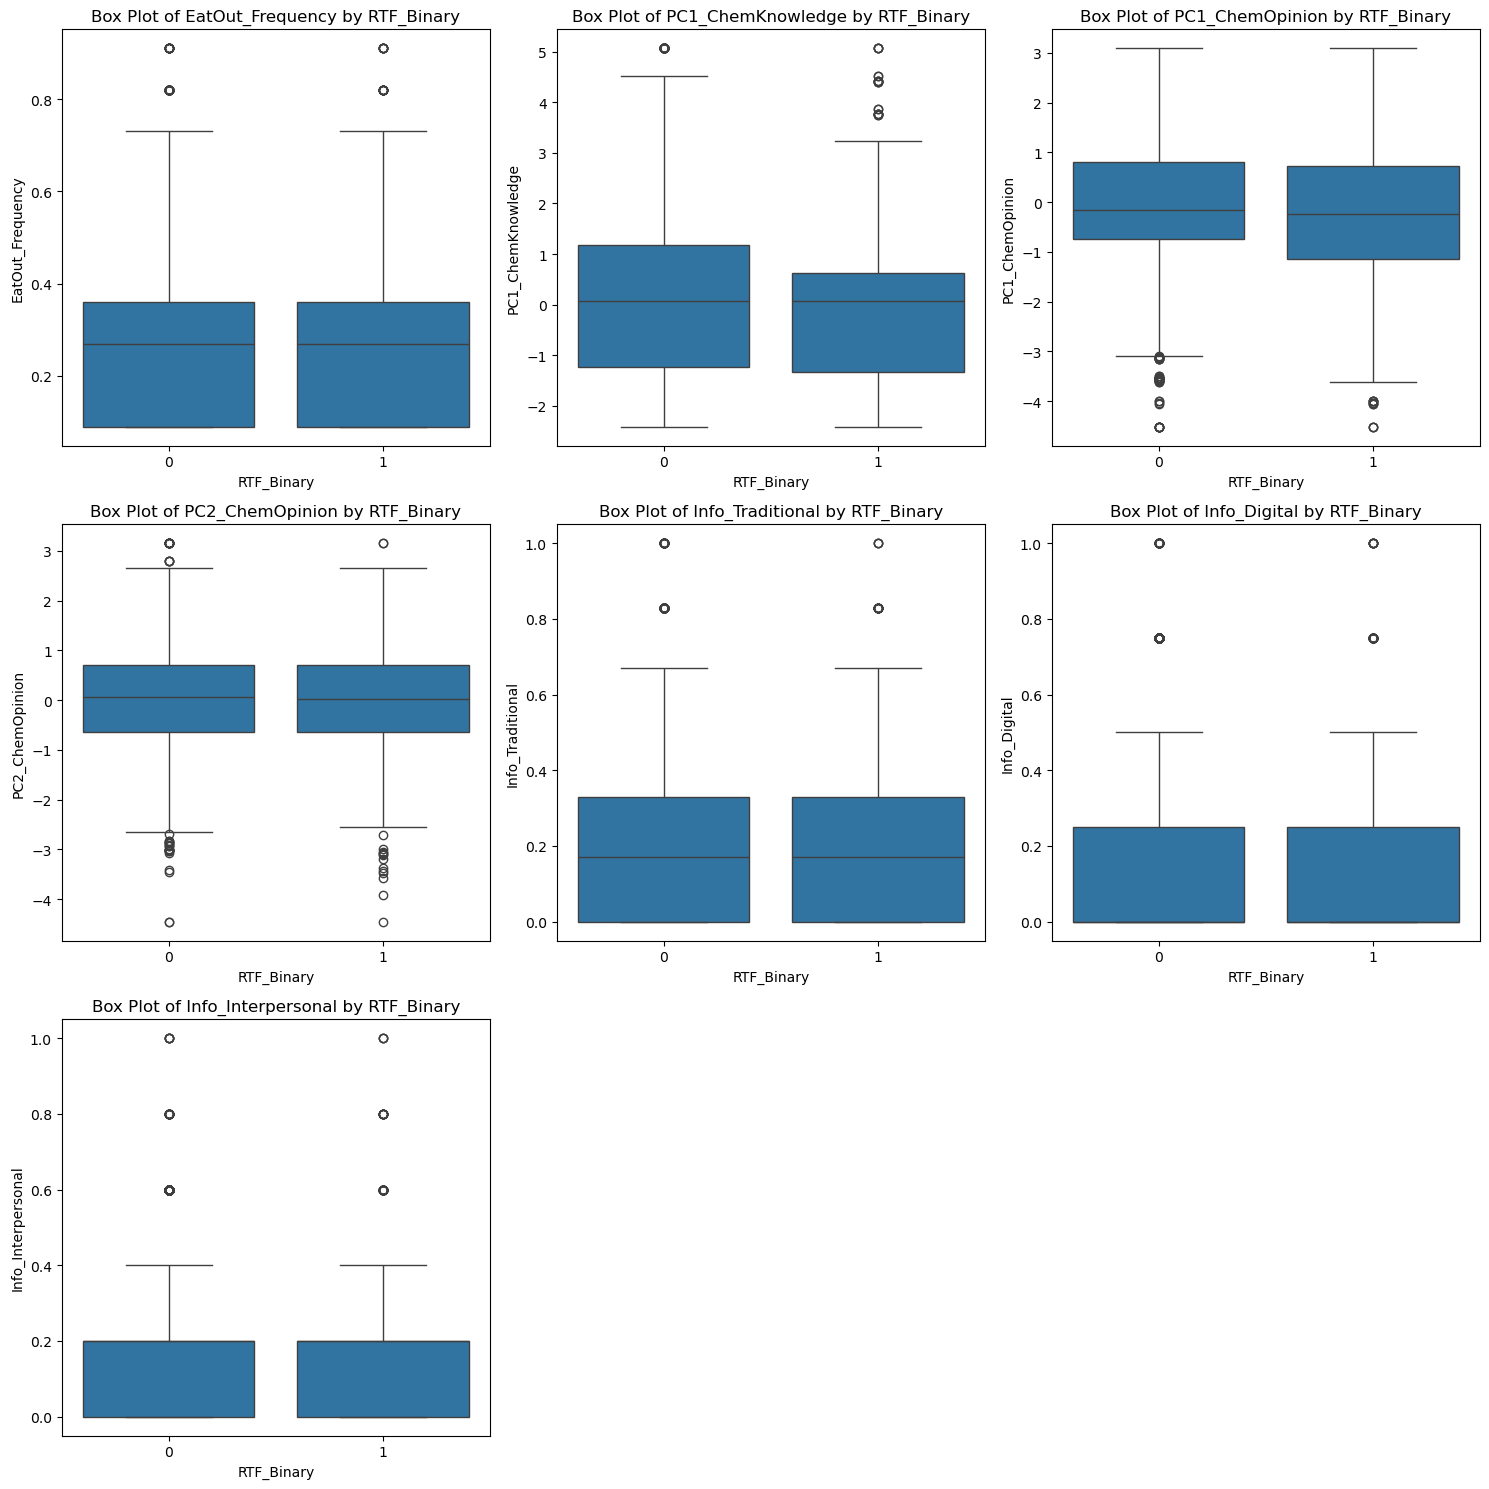

In [44]:
# box plot for numerical IVs
y_variables = ['EatOut_Frequency', 'PC1_ChemKnowledge', 'PC1_ChemOpinion', 'PC2_ChemOpinion',
               'Info_Traditional', 'Info_Digital', 'Info_Interpersonal']

# Create a figure with a 3x3 grid
# This will have 9 total spaces, with the last 2 being empty
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Loop through the list of variables with their index
for i, var in enumerate(y_variables):
    # Calculate the row and column for the current plot
    row = i // ncols
    col = i % ncols
    
    # Plot the box plot on the correct subplot (ax)
    sns.boxplot(x='RTF_Binary', y=var, data=Food_Final, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var} by RTF_Binary')

# Hide any unused subplots
for i in range(len(y_variables), nrows * ncols):
    row = i // ncols
    col = i % ncols
    axes[row, col].axis('off')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()

# Display the single figure with all the plots
plt.show()

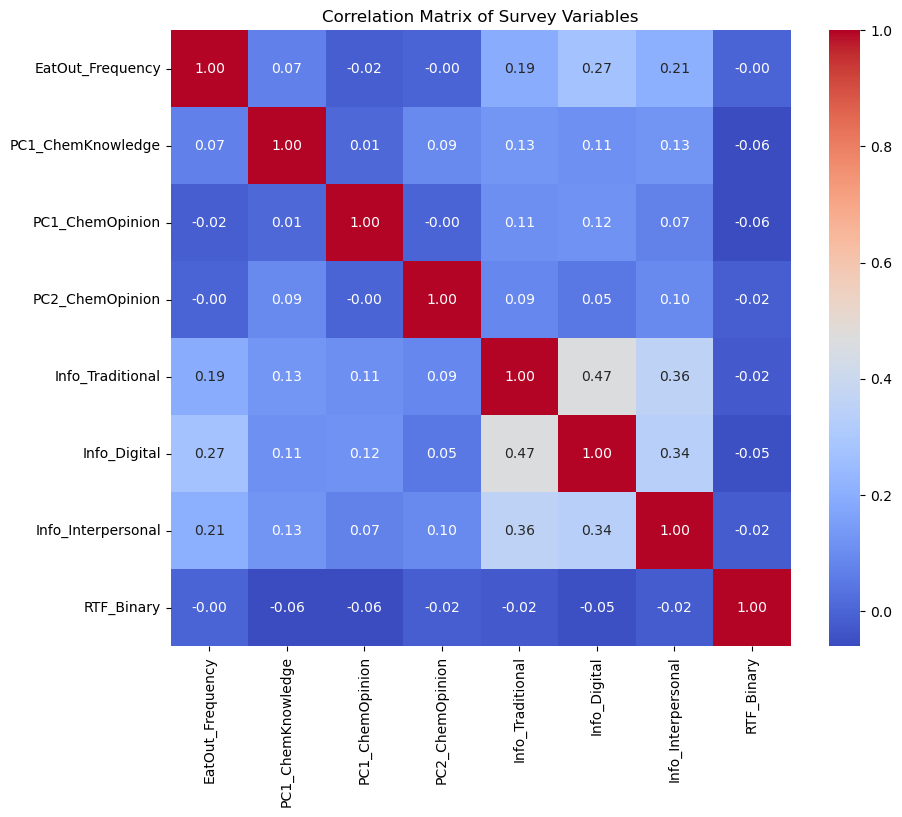

In [45]:
# correlation matrix for numerical data in this dataset
numerical_vars = Food_Final[['EatOut_Frequency', 'PC1_ChemKnowledge', 'PC1_ChemOpinion', 'PC2_ChemOpinion', 'Info_Traditional', 'Info_Digital', 'Info_Interpersonal', 'RTF_Binary']]
correlation_matrix = numerical_vars.corr()

# Create a heatmap
plt.figure(figsize=(10, 8)) # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Survey Variables')
plt.show()

# 6. Cluster analysis
- No statistical significance tests were applied before clustering analysis, as it is an unsupervised learning process. The cluster analysis was conducted after feature engineering (31 variables retained at this stage). However, the dependent variable (RTF_Binary) was excluded because it is a predefined variable, not a predictor. 5 demographic variables (age, gender, income, marital status and region) were also excluded as the segmentation is driven by respondents’ behavioural and attitudinal information. Instead, they are used for profiling the clusters. Hence, 25 variables were used for the clustering analysis.
- First, **hierarchical cluster analysis** was conducted to explore the possible number of clusters
- Then, **K-means** is used to identify the cluster number
- **Findings: The cluster exploration suggested that 2, 3, 4 or 5 clusters could be optimal.**

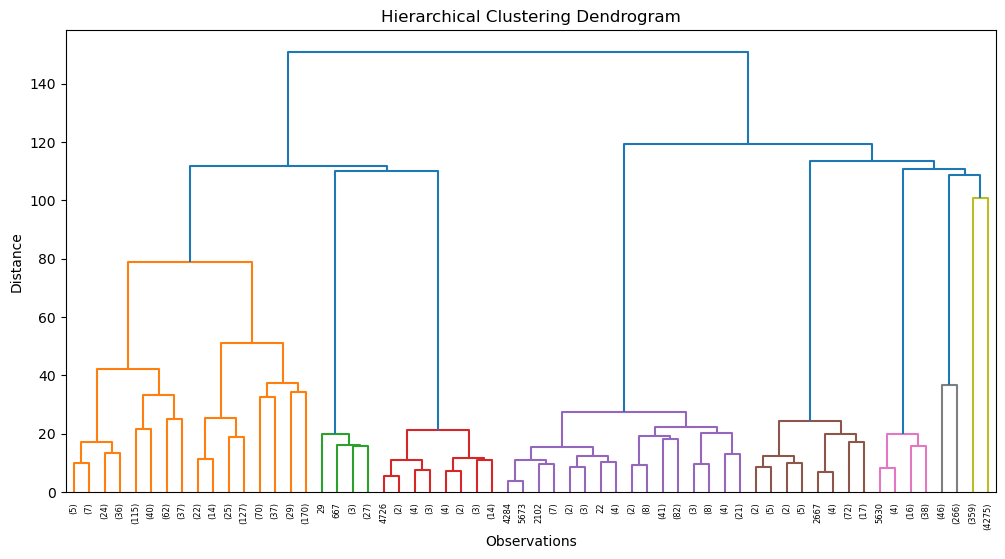

In [46]:
### cluster analysis hierarchical
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# 1. Drop demographic and DV variables
columns_to_exclude = ['RTF_Yearly_Count','RTF_Binary', 'Gender_RespSex', 'Age_age_dv', 'MaritalStatus_marstat2',
                      'HouseholdIncome_hhdinc', 'country_dv']  

cluster_vars = Food_Final.drop(columns=columns_to_exclude, errors='ignore')

# 2. One-hot encode categorical variables
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# 3. Standardise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_vars_encoded)

# 4. Create linkage matrix using Ward’s method
Z = linkage(X_scaled, method='ward')

# 5. Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # truncate for readability
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

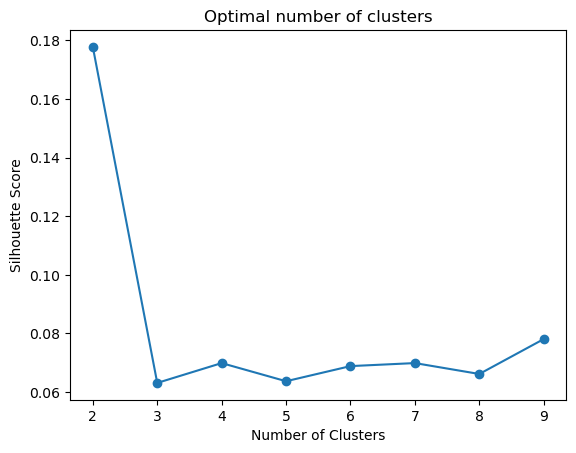

In [47]:
### cluster analysis K-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Select relevant variables for clustering
# Exclude the dependent variable (RTF_Binary), and dempgraphic variables
cluster_vars = Food_Final.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Gender_RespSex','Age_age_dv','country_dv',
                                        'MaritalStatus_marstat2','HouseholdIncome_hhdinc'], errors='ignore')

# Step 2: One-hot encode categorical variables
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# Step 3: Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_vars_encoded)

# Step 4: Find optimal number of clusters (optional, using silhouette score)
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
    labels = kmeans.fit_predict(cluster_scaled)
    silhouette_scores.append(silhouette_score(cluster_scaled, labels))

# Plot silhouette scores (optional)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal number of clusters')
plt.show()

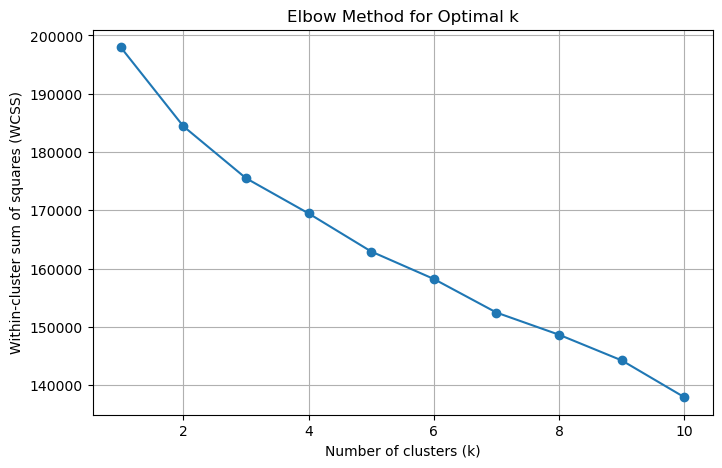

In [48]:
# elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare your data (exclude DV and demographics)
columns_to_exclude = ['RTF_Yearly_Count','RTF_Binary', 'Gender_RespSex', 'Age_age_dv',
                      'MaritalStatus_marstat2', 'HouseholdIncome_hhdinc', 'country_dv'] 

cluster_vars = Food_Final.drop(columns=columns_to_exclude, errors='ignore')
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# 2. Standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_vars_encoded)

# 3. Calculate WCSS for a range of k
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# 4. Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [52]:
#  Run KMeans with chosen number of clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=100)  # change n_clusters=_ to your chosen k
Food_Final['Cluster_4'] = kmeans_final.fit_predict(X_scaled)

In [53]:
# # drop cluster colunms if needed
# Food_Final=Food_Final.drop(columns=['Cluster_2'])

In [54]:
Food_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_RespSex                         6187 non-null   object 
 1   Age_age_dv                             6187 non-null   object 
 2   country_dv                             6187 non-null   object 
 3   MaritalStatus_marstat2                 6187 non-null   object 
 4   HouseholdIncome_hhdinc                 6187 non-null   object 
 5   ResponsibilityofPrepearingFood_CkRes   6187 non-null   object 
 6   HowOftenCookFood_CkFreq                6187 non-null   object 
 7   Vegan/Vegetarian_dietary               6187 non-null   object 
 8   HOEatBeef/Lamb/Pork_q2_14sub_dv        6187 non-null   object 
 9   HOEatChicken/Turkey_q2_14su4_dv        6187 non-null   object 
 10  HOEatDuck/Goose_q2_14su5_dv            6187 non-null   object 
 11  Respo

In [55]:
# Analyse clusters
pd.crosstab(Food_Final['Cluster_2'], Food_Final['RTF_Binary'])

RTF_Binary,0,1
Cluster_2,,
0,633,229
1,4053,1272


### Cluster Evaluation
**Three supervised learning algorithms (ANN, decision tree, and discriminant analysis) were applied to evaluate the classification accuracy of each K-means cluster result.** In this step, the cluster assignments from  K-means were treated as the DV, while five demographic variables served as IVs. This simulated a scenario in which only demographic data is available to predict the new customers.

Findings: **The 2-cluster solution is selected for this research as it achieves the highest silhouette score and consistently strong classification accuracy across all three supervised learning models.**

- Cluster 2 Silhouette:0.18, ANN:86.9%, Decision Tree:71.6%, Discriminant analysis:85.5%
- Cluster 3 Silhouette:0.065, ANN:49.6%, Decision Tree:44.1%, Discriminant analysis:49.6%
- Cluster 4 Silhouette:0.75, ANN:48.2%, Decision Tree:31.6%, Discriminant analysis:47.9%
- Cluster 5 Silhouette:0.065, ANN:37.9%, Decision Tree:32.3%, Discriminant analysis:38.5%

In [56]:
# use ANN to test the clustering
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# X = demographic variable
# y = cluster labels (0 or 1)
demo_vars = Food_Final[['Gender_RespSex', 'Age_age_dv',
                                 'MaritalStatus_marstat2', 'HouseholdIncome_hhdinc', 'country_dv']]
demo_vars_encoded = pd.get_dummies(demo_vars, drop_first=True)

X = demo_vars_encoded  # already one-hot encoded and scaled if needed, use the demographic variables for prediction
y = Food_Final['Cluster_2']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train ANN
model = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=1000, early_stopping=False,random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))

ANN Accuracy: 86.91%
              precision    recall  f1-score   support

           0       0.64      0.11      0.19       255
           1       0.87      0.99      0.93      1602

    accuracy                           0.87      1857
   macro avg       0.76      0.55      0.56      1857
weighted avg       0.84      0.87      0.83      1857



In [57]:
# Decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# X = demographic variables (already one-hot encoded)
# y = cluster labels (0, 1, 2 for example)
demo_vars = Food_Final[['Gender_RespSex', 'Age_age_dv',
                        'MaritalStatus_marstat2', 'HouseholdIncome_hhdinc', 'country_dv']]
demo_vars_encoded = pd.get_dummies(demo_vars, drop_first=True)

X = demo_vars_encoded
y = Food_Final['Cluster_2']  # make sure this is categorical or integer labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
model = model = DecisionTreeClassifier(
    max_depth=None,           # allow full depth
    min_samples_split=2,      # lower threshold for branching
    class_weight='balanced',  # account for class imbalance
    random_state=42
)  # you can tune max_depth
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 71.57%
              precision    recall  f1-score   support

           0       0.28      0.69      0.40       255
           1       0.94      0.72      0.81      1602

    accuracy                           0.72      1857
   macro avg       0.61      0.70      0.61      1857
weighted avg       0.85      0.72      0.76      1857



In [58]:
# Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X = demographic features (one-hot encoded if needed)
# y = cluster labels (e.g., 0, 1, 2)
demo_vars = Food_Final[['Gender_RespSex', 'Age_age_dv',
                        'MaritalStatus_marstat2', 'HouseholdIncome_hhdinc', 'country_dv']]
demo_vars_encoded = pd.get_dummies(demo_vars, drop_first=True)

X = demo_vars_encoded
y = Food_Final['Cluster_2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict
y_pred = lda.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))

LDA Accuracy: 85.46%
              precision    recall  f1-score   support

           0       0.42      0.16      0.24       255
           1       0.88      0.96      0.92      1602

    accuracy                           0.85      1857
   macro avg       0.65      0.56      0.58      1857
weighted avg       0.82      0.85      0.83      1857



In [59]:
### 2 clusters profiling
# Identify variables
numerical_vars = Food_Final.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = Food_Final.select_dtypes(include='object').columns.tolist()

# Remove Cluster and RTF_Binary from profiling vars
numerical_vars = [col for col in numerical_vars if col not in ['RTF_Binary', 'Cluster_2','RTF_Yearly_Count']]
categorical_vars = [col for col in categorical_vars if col not in ['RTF_Binary']]

# numerical profiling
numerical_profile = Food_Final.groupby('Cluster_2')[numerical_vars].mean().T.round(2)

# categorical profiling
categorical_profile = pd.DataFrame()

for var in categorical_vars:
    # Create dummy vars for each category (without dropping any)
    dummies = pd.get_dummies(Food_Final[var], prefix=var)
    dummies['Cluster_2'] = Food_Final['Cluster_2']
    
    # Calculate proportion per cluster
    cluster_avg = dummies.groupby('Cluster_2').mean().T.round(2)
    
    # Append to final profile table
    categorical_profile = pd.concat([categorical_profile, cluster_avg])

# RTF profiling
rtf_profile = Food_Final.groupby('Cluster_2')['RTF_Binary'].mean().round(2)
rtf_row = pd.DataFrame(rtf_profile).T
rtf_row.index = ['RTF_EatingRate']

full_profile = pd.concat([rtf_row, numerical_profile, categorical_profile])
pd.options.display.float_format = '{:,.2f}'.format

print(Food_Final['Cluster_2'].value_counts())
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    full_profile['difference']=(full_profile[0]-full_profile[1]).abs()
    full_profile=full_profile.sort_values(by='difference', ascending=False)
    print(full_profile)

Cluster_2
1    5325
0     862
Name: count, dtype: int64
Cluster_2                                                0    1  difference
ResponsibilityForGroceryShopping_Q3_1_Primary/Shared  0.07 0.91        0.84
ResponsibilityForGroceryShopping_Q3_1_No/Own          0.76 0.00        0.76
ResponsibilityofPrepearingFood_CkRes_No/Own           0.61 0.01        0.60
ResponsibilityofPrepearingFood_CkRes_Main/Share       0.39 0.99        0.60
HowOftenCookFood_CkFreq_Frequent                      0.57 0.98        0.41
HowOftenCookFood_CkFreq_Infrequent                    0.41 0.01        0.40
Gender_RespSex_Female                                 0.31 0.64        0.33
Gender_RespSex_Male                                   0.69 0.36        0.33
PC1_ChemKnowledge                                    -0.27 0.04        0.31
EnjoyCooking_q4_277dv_Uncertain/Disagree              0.59 0.31        0.28
PC1_ChemOpinion                                      -0.23 0.04        0.27
NoTimeCooking_q4_279dv_Agree/Unc

## Cluster Profiling
### Cluster 0 (14%, 862 respondents)
- 41% cook infrequently 17% totally enjoy cooking, 59% uncertain/negative about cooking, PC1_ChemKnowledge = −0.27, PC1_ChemOpinion = −0.23
- 76% no grocery shopping responsibility, 61% no or only self-focused cooking responsibility, Shop in mini-market: 33% Shop in garage forecourt: 6% Shop in indie grocer: 12%
- 51% have problem finding time to cook, 70% less agree to try new things 50% trust information on the label for food, Lower engagement with both traditional and digital cooking information channels
- 69% are male, Skewed to emerging <24 (+18%) and senior >75 (+5%) people 64% have a low-income (<£25,999), Region mixes: England 64%, Northern Ireland 19%, Wales 17%
- Profile: Less engaged in cooking, lower knowledge of food chemical safety, and fewer responsibilities for grocery shopping or cooking for others. More likely male, younger or much older, and from lower-income households. Lower openness to trying new foods, higher perceived time constraints, and lower engagement with food information channels. Shopping habits focus mainly on supermarkets with little use of smaller-format stores.

### Cluster 1 (86%, 5,325 respondents)
- 98% cook frequently 39% totally enjoy cooking
31% uncertain/negative about cooking
PC1_ChemKnowledge = 0.04
PC1_ChemOpinion = 0.04
- 91% main grocery shoppers 99% main/shared cooking responsibility
Shop in mini-market: 41%
Shop in garage forecourts: 8% Shop in indie grocers: 17%
- 24% show concern about time constrain in cooking
37% open to try new things
57% trust information on the label for food
Rely on digital channel and tradition channel to obtain information about cooking safety
- 64% are female
Skewed to young 25-44 (30%) and mature adults 45-74 (53%) 42% have a mid-to-high (≥£25,999) income
Region differences are small (England +4%).
- Profile: Highly engaged home cooks with strong knowledge and more positive attitudes toward food safety. Predominantly female, working-age, and higher income. Responsible for most grocery and cooking tasks, shop mainly in supermarkets but also use a wider range of smaller-format outlets. More open to new foods, less constrained by time, and higher trust in food labels. Greater use of both traditional and digital information sources for cooking and food safety.

# 7. Predictive modelling
Three supervised learning algorithms were used to identify the important factors that impact consumers’ behaviours in buying RTE meals: (1) logistic regression, (2) random forest, and (3) ANN.

In [46]:
# Drop the variables have p-value > 0.05 before run predictive analysis
columns_to_drop = [
    'ResponsibilityofPrepearingFood_CkRes',
    'Vegan/Vegetarian_dietary',
    # 'HOEatChicken/Turkey_q2_14su4_dv',
    'GroceryInMiniMarketQ3_32',
    'GroceryInLocalShop_Q3_33',
    'KitchenAccess_Q4_8a',
    'TrustInfoOnLabel_Label'
]

Food_predictive = Food_Final.drop(columns=columns_to_drop)
Food_predictive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6187 entries, 8354 to 14540
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_RespSex                         6187 non-null   object 
 1   Age_age_dv                             6187 non-null   object 
 2   country_dv                             6187 non-null   object 
 3   MaritalStatus_marstat2                 6187 non-null   object 
 4   HouseholdIncome_hhdinc                 6187 non-null   object 
 5   HowOftenCookFood_CkFreq                6187 non-null   object 
 6   HOEatBeef/Lamb/Pork_q2_14sub_dv        6187 non-null   object 
 7   HOEatChicken/Turkey_q2_14su4_dv        6187 non-null   object 
 8   HOEatDuck/Goose_q2_14su5_dv            6187 non-null   object 
 9   ResponsibilityForGroceryShopping_Q3_1  6187 non-null   object 
 10  GroceryInLargeSupermarket_Q3_31        6187 non-null   object 
 11  Groce

In [47]:
# Use statsmodels.api to check the p-value for IV
import statsmodels.api as sm

# Step 2: Prepare the data
# Exclude dependent and cluster variables
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4'], errors='ignore')
y = Food_predictive['RTF_Binary']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Reset index to ensure alignment
X_encoded = X_encoded.reset_index(drop=True)
y = y.reset_index(drop=True)
    
# Step 5: Ensure all values are numeric
X_encoded = X_encoded.astype(float)

# Step 6: Add constant (intercept)
X_encoded = sm.add_constant(X_encoded)

# Step 7: Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_encoded)
result = logit_model.fit()

# Step 8: Display regression output
print(result.summary2())  # Cleaner format than summary()

Optimization terminated successfully.
         Current function value: 0.505286
         Iterations 6
                                           Results: Logit
Model:                          Logit                       Method:                      MLE        
Dependent Variable:             RTF_Binary                  Pseudo R-squared:            0.088      
Date:                           2025-09-07 23:01            AIC:                         6316.4089  
No. Observations:               6187                        BIC:                         6531.7755  
Df Model:                       31                          Log-Likelihood:              -3126.2    
Df Residuals:                   6155                        LL-Null:                     -3428.0    
Converged:                      1.0000                      LLR p-value:                 2.4269e-107
No. Iterations:                 6.0000                      Scale:                       1.0000     
--------------------------------

In [49]:
# Initial Logistic regression, check variables have p > 0.05
summary_df = result.summary2().tables[1].copy()

# Step: Create final table with B, Exp(B), and p-value
final_table = pd.DataFrame({
    'B': summary_df['Coef.'],
    'Exp(B)': np.exp(summary_df['Coef.']),
    'p-value': summary_df['P>|z|']
})

# Optional: Round for better display
final_table = final_table.round(8)

# Display the final result
print("\nInitial Logistic Regression Table with stats:")
print(final_table.sort_values('p-value', ascending=False))

pd.options.display.float_format = '{:.6f}'.format


Initial Logistic Regression Table with stats:
                                                         B  Exp(B)  p-value
HowOftenCookFood_CkFreq_It varies                   0.0006  1.0006   0.9987
PC2_ChemOpinion                                     0.0063  1.0063   0.8444
ResponsibilityForGroceryShopping_Q3_1_Primary/S... -0.0223  0.9780   0.8404
Info_Interpersonal                                  0.0500  1.0513   0.8102
const                                               0.1892  1.2083   0.6148
Age_age_dv_Young(25-44)                            -0.1147  0.8917   0.4229
ResponsibilityForGroceryShopping_Q3_1_No/Own       -0.1386  0.8706   0.3145
TryNewThingsToEat_q4_276dv_Totally agree           -0.0737  0.9290   0.3071
GroceryInLargeSupermarket_Q3_31_Not mentioned       0.1583  1.1715   0.2255
Age_age_dv_Mature(45-74)                            0.1743  1.1904   0.2173
Info_Digital                                       -0.2635  0.7684   0.1416
country_dv_Wales                         

In [65]:
#### improved regression model ######

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define DV and exclude cluster columns
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4'], errors='ignore')
y = Food_predictive['RTF_Binary']

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Drop selected dummy variables (non-significant)
to_drop = [
    'PC2_ChemOpinion',
    'Info_Interpersonal',
    'GroceryInLargeSupermarket_Q3_31_Not mentioned',
    'TryNewThingsToEat_q4_276dv_Totally agree',
    'Info_Digital',
    'PC1_ChemOpinion'
]

# Drop only if they exist in the dataset
X_encoded = X_encoded.drop(columns=[col for col in to_drop if col in X_encoded.columns])

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Initial Accuracy: 0.7625201938610663
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1406
           1       0.55      0.12      0.20       451

    accuracy                           0.76      1857
   macro avg       0.66      0.54      0.53      1857
weighted avg       0.72      0.76      0.70      1857



In [67]:
# Model with logistic regression

import numpy as np

# Get feature names
feature_names = X_train.columns

# Get coefficients and intercept
coef = model.coef_[0]            # model.coef_ is shape (1, n_features) for binary
intercept = model.intercept_[0]

# Calculate Exp(B) – odds ratios
odds_ratios = np.exp(coef)

# Create a summary table
summary_table = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient (B)': coef,
    'Exp(B)': odds_ratios
})

# Add intercept row
intercept_row = pd.DataFrame({
    'Variable': ['Intercept'],
    'Coefficient (B)': [intercept],
    'Exp(B)': [np.exp(intercept)]
})

summary_table = pd.concat([intercept_row, summary_table], ignore_index=True)

print(summary_table.sort_values('Coefficient (B)',ascending=False))


                                             Variable  Coefficient (B)  Exp(B)
7                              Age_age_dv_Senior(>75)           0.2446  1.2771
5                                 Gender_RespSex_Male           0.2318  1.2609
24           EnjoyCooking_q4_277dv_Uncertain/Disagree           0.1440  1.1548
6                            Age_age_dv_Mature(45-74)           0.1396  1.1498
15         HOEatBeef/Lamb/Pork_q2_14sub_dv_Infrequent           0.1070  1.1130
3                                    Info_Traditional           0.0873  1.0912
21           GroceryInIndieGrocer_Q3_35_Not mentioned           0.0484  1.0496
1                                    EatOut_Frequency           0.0231  1.0233
19  ResponsibilityForGroceryShopping_Q3_1_Primary/...           0.0097  1.0098
14                  HowOftenCookFood_CkFreq_It varies           0.0070  1.0070
4                                           Cluster_5           0.0053  1.0053
8                             Age_age_dv_Young(25-44

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define DV and exclude cluster columns
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4'], errors='ignore')
y = Food_predictive['RTF_Binary']

# Step 2: One-hot encode categorical variables WITHOUT dropping the first
X_encoded = pd.get_dummies(X, drop_first=False)

# Step 3: Drop selected dummy variables:
# a) Non-significant variables (from your previous step)
# b) Baseline categories for interpretability

to_drop = [
    # Non-significant variables
    'PC2_ChemOpinion',
    'Info_Interpersonal',
    'GroceryInLargeSupermarket_Q3_31_Not mentioned',
    'GroceryInLargeSupermarket_Q3_31_Mentioned',
    'TryNewThingsToEat_q4_276dv_Totally agree',
    'TryNewThingsToEat_q4_276dv_Less agree',
    'Info_Digital',
    'PC1_ChemOpinion',
    # Reference categories to improve interpretability
    'Gender_RespSex_Female',
    'Age_age_dv_Young(25-44)',
    'country_dv_England',
    'MaritalStatus_marstat2_With Partner',
    'HouseholdIncome_hhdinc_Mid-to-High Income (≥£25,999)',

    'HOEatDuck/Goose_q2_14su5_dv_Infrequent',
    'HOEatChicken/Turkey_q2_14su4_dv_Infrequent',
    'HOEatBeef/Lamb/Pork_q2_14sub_dv_Infrequent',

    'GroceryInGarageForecourt_Q3_34_Not mentioned',
    'GroceryInIndieGrocer_Q3_35_Not mentioned',

    'HowOftenCookFood_CkFreq_Infrequent',
    'EnjoyCooking_q4_277dv_Totally agree',
    'MicrowaveAccess_Q4_8c8_Not mentioned',
    'NoTimeCooking_q4_279dv_Totally disagree',

    'ResponsibilityForGroceryShopping_Q3_1_No/Own'
]

# Drop only the variables that exist
X_encoded = X_encoded.drop(columns=[col for col in to_drop if col in X_encoded.columns])

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Tuned Model Accuracy: 0.7619816908992999
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1406
           1       0.54      0.12      0.20       451

    accuracy                           0.76      1857
   macro avg       0.66      0.54      0.53      1857
weighted avg       0.72      0.76      0.70      1857



In [69]:
# Final Model with logistic regression
import numpy as np

# Get feature names
feature_names = X_train.columns

# Get coefficients and intercept
coef = model.coef_[0]            # model.coef_ is shape (1, n_features) for binary
intercept = model.intercept_[0]

# Calculate Exp(B) – odds ratios
odds_ratios = np.exp(coef)

# Create a summary table
summary_table = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient (B)': coef,
    'Exp(B)': odds_ratios
})

# Add intercept row
intercept_row = pd.DataFrame({
    'Variable': ['Intercept'],
    'Coefficient (B)': [intercept],
    'Exp(B)': [np.exp(intercept)]
})

summary_table = pd.concat([intercept_row, summary_table], ignore_index=True)

print('Tuned Model')
print(summary_table.sort_values('Coefficient (B)',ascending=False))

Tuned Model
                                             Variable  Coefficient (B)  Exp(B)
24           EnjoyCooking_q4_277dv_Uncertain/Disagree           0.3597  1.4329
25             NoTimeCooking_q4_279dv_Agree/Uncertain           0.3514  1.4211
11                      MaritalStatus_marstat2_Single           0.2822  1.3260
8                              Age_age_dv_Senior(>75)           0.2511  1.2855
5                                 Gender_RespSex_Male           0.2314  1.2604
23                        EnjoyCooking_q4_277dv_Agree           0.2073  1.2304
7                            Age_age_dv_Mature(45-74)           0.1490  1.1606
12       HouseholdIncome_hhdinc_Low Income (<£25,999)           0.1341  1.1436
13                   HowOftenCookFood_CkFreq_Frequent           0.1284  1.1370
16           HOEatChicken/Turkey_q2_14su4_dv_Frequent           0.0999  1.1051
22                   MicrowaveAccess_Q4_8c8_Mentioned           0.0942  1.0987
3                                    Inf

In [70]:
###### random forest ######

In [71]:
# random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Prepare the data
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5'], errors='ignore')
y = Food_predictive['RTF_Binary']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop previously identified irrelevant variables
columns_to_drop = [
    # Non-significant variables
    'PC2_ChemOpinion',
    'Info_Interpersonal',
    'GroceryInLargeSupermarket_Q3_31_Not mentioned',
    'GroceryInLargeSupermarket_Q3_31_Mentioned',
    'TryNewThingsToEat_q4_276dv_Totally agree',
    'TryNewThingsToEat_q4_276dv_Less agree',
    'Info_Digital',
    'PC1_ChemOpinion'
]
X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 8: Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
print(importances.sort_values(ascending=False))


Random Forest
Accuracy: 0.7485191168551427
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1406
           1       0.45      0.16      0.23       451

    accuracy                           0.75      1857
   macro avg       0.61      0.55      0.54      1857
weighted avg       0.70      0.75      0.70      1857

PC1_ChemKnowledge                                      0.2071
EatOut_Frequency                                       0.1282
Info_Traditional                                       0.1052
HOEatBeef/Lamb/Pork_q2_14sub_dv_Infrequent             0.0435
HOEatChicken/Turkey_q2_14su4_dv_Infrequent             0.0356
HouseholdIncome_hhdinc_Mid-to-High Income (≥£25,999)   0.0352
MaritalStatus_marstat2_With Partner                    0.0351
Gender_RespSex_Male                                    0.0335
country_dv_Wales                                       0.0328
NoTimeCooking_q4_279dv_Disagree                        0.0321
EnjoyCooki

In [72]:
###### ANN ######

ANN
ANN Accuracy: 0.7571351642434033

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1406
           1       0.50      0.23      0.31       451

    accuracy                           0.76      1857
   macro avg       0.64      0.58      0.58      1857
weighted avg       0.72      0.76      0.72      1857


 Important features (ANN):
                                              Feature  Importance Mean
9                 MaritalStatus_marstat2_With Partner           0.0174
24            NoTimeCooking_q4_279dv_Totally disagree           0.0137
23                    NoTimeCooking_q4_279dv_Disagree           0.0107
17  ResponsibilityForGroceryShopping_Q3_1_Primary/...           0.0076
5                              Age_age_dv_Senior(>75)           0.0070
10  HouseholdIncome_hhdinc_Mid-to-High Income (≥£2...           0.0042
21                EnjoyCooking_q4_277dv_Totally agree           0.0042
3               

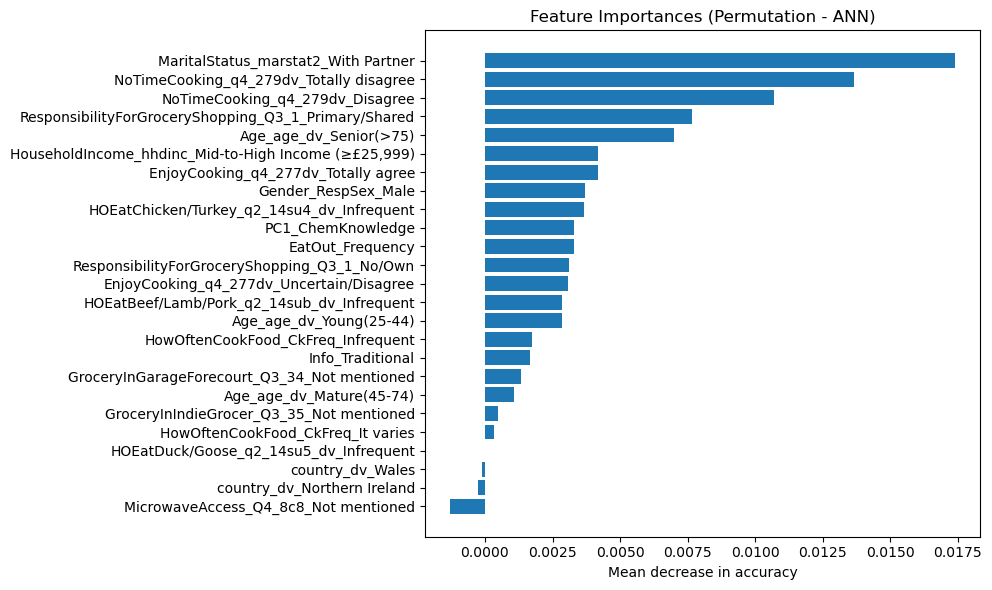

In [73]:
# ANN to predict RTF 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Step 2: Prepare data
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5'], errors='ignore')
y = Food_predictive['RTF_Binary']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop specific insignificant variables (from logistic regression)
columns_to_drop = [
    'PC2_ChemOpinion',
    'Info_Interpersonal',
    'GroceryInLargeSupermarket_Q3_31_Not mentioned',
    'GroceryInLargeSupermarket_Q3_31_Mentioned',
    'TryNewThingsToEat_q4_276dv_Totally agree',
    'TryNewThingsToEat_q4_276dv_Less agree',
    'Info_Digital',
    'PC1_ChemOpinion', 
]
X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Scale features (important for ANN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and train ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
print("ANN")
y_pred = mlp_model.predict(X_test_scaled)
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Permutation importance
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 10: Show top important features
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)


print("\n Important features (ANN):")
print(importances_df.head(30))

# Step 11: Optional – Plot importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Feature Importances (Permutation - ANN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Comparison and Discussion of the Three Predictive Models
- Three models have a similar rate of accuracy 75%. The classification tables reveal that three models are good at predicting low-frequency RTE meal consumers (accuracy from 77-79%), while for the high-frequency consumers, the accuracy is lower (between 45-55%). This disparity is likely due to the imbalanced distribution of the DV.
- The logistic regression provides the clearest interpretability, showing both the effects of each factor on the DV. In this model, positive coefficients (Exp(B) > 1) indicate a higher likelihood of high-frequency RTE meal consumption, while negative coefficients (Exp(B) < 1) indicate a lower likelihood. Random forest reinforced several logistic regression findings, particularly the importance of household income, marital status, gender, meat consumption, and traditional media. It also captures a different interaction, as it ranked PC1_ChemConcern and EatOut_Frequency as strong predictors. ANN’s interpretability is lower, but the top predictors overlapped strongly with the logistic findings.

### Interpretation: 
1. The largest effect comes from people who are uncertain or do not enjoy cooking; they have 43% higher odds of purchasing RTE meals compared to enthusiastic cooks (totally agree). A moderate cooking engagement for both enthusiastic and less enthusiastic people may choose RTE meals, likely as a convenience supplement rather than a replacement. Product safety perceptions could act as a barrier, though the effect here is low; this factor was ranked first in the random forest model.
2. People who are exposed to a convenience-oriented purchase environment or are in active shopping roles have slightly higher RTE meals demand. The chance is still higher even for occasional shoppers, as they are more open to quick meal solutions. As for shopping venue, the result aligns with the fact that supermarkets dominate RTE distribution, as the availability of RTE meals is As for the shop low in independent grocers.
3. Convenience is still a key factor, as the odds of RTE meals purchase increase progressively as perceived time scarcity increases. For marketing campaigns, traditional channels such as print media (newspapers, magazines), television, and radio can effectively reach high-potential consumers. Eating out has a marginal positive effect. Protein preferences also shape motivation. Poultry-based offerings resonate with existing RTE meal-eating habits better compared to beef/lamb/pork.
4. Being a single, male, mature or senior (>45)significantly increase the RTE meals purchase odds.
Lower income is also positively associated, potentially due to the view of RTE meals as a more affordable option than fresh alternatives. Regional differences are clear. People in England have higher RTE meals purchase odds.

# 8. Recommendation and Business Implications
The strategic recommendations for launching oriental-flavoured ready-to-eat (RTE) meals in the UK are informed by the combined insights from the cluster analysis, customer profiling, and predictive modelling. By combining two perspectives (supervised and unsupervised), the recommendation can ensure that product, place, and promotional strategies are grounded in data-driven evidence. While no direct pricing variables were available in the dataset, the analysis on the key players in the UK market supplements the recommendations to ensure competitive positioning.

## Customer personas
Three personas (Ben, John, and Sarah) were developed from the 2-cluster profiling results to help the company understand consumer segments beyond statistical outputs. Cluster 0 has a higher frequency of RTE meal consumption (27%) but lower cooking capability and motivation. Since cluster 0 is demographically skewed towards emerging adults (<24) and seniors (>75), it leads to the development of two separate personas for this cluster (Ben and John). Cluster 1, by contrast, shows strong cooking skills, high motivation, and a slightly lower uptake of RTE meals (24%), with more homogeneous demographics, resulting in one persona (Sarah). 

## Cluster 0 (Ben, 22)
### Persona description
A busy university student with a part-time job, Ben lives in shared accommodation and doesn’t prioritise cooking. He prefers simple, familiar meals that require minimal preparation. He shops mainly at supermarkets and rarely visits smaller speciality stores. Ben isn’t particularly focused on food-safety details or ingredient sourcing. Despite low engagement with cooking, Ben is a frequent RTE meal consumer, driven by convenience, time constraints, affordability, and minimal preparation needs.

### Marketing 4P implication
- Product: Single-serve, microwave-ready Heat & Eat bowls (350–420 g). Familiar oriental sauces. Poultry-led (e.g., Teriyaki Chicken rice; Sweet Chilli Chicken noodles).
- Place: Primarily distributed in big 4 supermarkets. Secondary channels are convenient and garage forecourts.
- Promotion: Message “Hot meal in 4 minutes. No cooking.” Channel In-store point of sale and shelf-stripes in ready meal zone.
- Price: £3.5-£4.0

## Cluster 0 (John, 75)
### Persona description
Retired and living alone, John is cooking minimally, with meals kept simple and familiar. He does his grocery shopping at supermarkets and rarely visits smaller or specialist outlets. While he doesn’t actively seek novelty, his reliance on RTE meals is habit- driven and looking for convenience and reduced physical effort in cooking.

### Marketing 4P implication
- Product: Single-serve, microwave-ready Heat & Eat bowls (350–420 g). Familiar oriental sauces. Poultry-led (e.g., Teriyaki Chicken rice; Sweet Chilli Chicken noodles).
- Place: Primarily distributed in big 4 supermarkets. Secondary channels are convenient and garage forecourts.
- Promotion: Message “Easy supper with real ingredients.” Channel Aisle signage and endcaps; store magazine/leaflet.
- Price: £3.5-£4.0

## Cluster 1 (Sarah, 48)
### Persona description
Sarah is a mid-career professional living with her partner in a suburban area. She enjoys cooking and preparing most meals at home. She is interested in ingredient quality and is moderately health-conscious. She shops from a different of channels for food variety and quality. While her RTE meal consumption is lower, she is open to using them as an occasional time-saver. RTE products appeal to her if they are high- quality, authentic, healthy and can complement her home cooking.

### Marketing 4P implication
- Product: Premium Cook-assist RTE to complement home cooking. 1–2 serve trays with finishing elements (e.g., glaze/topper/vegetable). Examples: Korean Gochujang Honey Chicken; Cantonese Five-Spice Duck with Plum-Hoisin Glaze (limited time offer).
- Place: Big 4 supermarkets in premium section; prioritise Waitrose/M&S. Cross-merch with fresh herbs, salad, premium rice.
- Promotion: Message “Authentic flavour, finished at home.” Channel Premium-section story cards; retailer editorial recipe cards.
- Price: £5.5-£7.0

### Note for the company:
- Prioritise poultry at launch; de-prioritise beef/lamb/pork. Avoid complex prep kits. Clean label on all packs. Optional duck (limited time offer) to test interest.
- Distribution channels should be supplemented with online platforms to maximise sales. De-prioritise independent grocers at launch. Phase regions: England major conurbations first; Wales and Northern Ireland after proof of velocity.
- Prioritise the traditional media channel. As Digital channels have an insignificant impact on the predictive model, keep it close to the point of purchase (search, retailer banners, app coupons). Avoid heavy social media spend. This is also likely because social media users are more health-conscious.
- Limited variables about price in the dataset. Price ranges are given based on the income level and analysis of key competitors in the UK market.
- The company should prioritise cluster 0 (Ben and John) for market entry, leveraging their higher RTE meal consumption to drive higher sales and secure retail presence. Although younger consumers, such as Ben, show a weak positive impact in the predictive model, they form the largest consumer base, as indicated by Mintel (2024a). This group present a higher lifetime value, is more receptive to shaping preferences towards Oriental flavours and higher acceptance of international cuisine. John-type seniors within cluster 0 are also valuable, with a strong positive driver in the predictive model. Alignment with the UK’s ageing population trend, they offer a growing pool of convenience-oriented buyers.
- Customer such as Sarah in cluster 1 is seeded from launch with a premium “cook-assist” proposition to appeal to their larger market size, indicated in this dataset. Though less frequently buy RTE meals now, they hold a higher spending power. The combination of cross-merchandising, premium placement, and storytelling aims to build long-term adoption.

### Limitations
- While the dataset is broad and rich, it was not originally designed for analysing oriental- flavoured RTE meals and therefore lacks variables directly capturing consumer responses to this category. In terms of supervised learning models, variables such as meat consumption frequency and attitudes towards trying new foods were included, but they provide relatively weak predictive power. Variables related to health consciousness (e.g., weight management, calorie awareness, food allergies) and sustainability (e.g., concern over plastic packaging) were initially considered but later excluded due to over 50% missing data. These topics may have been less prominent in the survey years used for this research (2016 and 2018), but have since become more relevant in the current RTE market (Mintel, 2024a). The absence of variables on health consciousness, attitude on sustainability, plant-based preferences, and innovative RTE formats, preference for chilled or frozen meals, limits the depth of insight for product recommendations. Model performance was limited by the imbalanced distribution of frequent versus infrequent buyers, leading to higher accuracy for low-frequency consumers. A higher predictive power for high-frequency buyers would be commercially more desirable.
- A model predicting the number of times people buy RTE meals was created using Poisson and negative binomial regression, due to the skewed distribution of the dependent variable. The analysis was excluded from the main report due to the low accuracy of these models. The absence of more targeted data limits the ability to forecast the potential sales accurately.
- The cluster analysis also has limitations. While two-cluster offers a high accuracy solution, the hierarchical dendrogram suggested that a refined three-cluster structure might yield greater segmentation. For example, Cluster 0 combines two consumer personas (emerging adult Ben and senior John), who may have different capabilities, opportunities, and motivations for RTE consumption. Inclusion of additional variables could improve cluster distinctiveness and targeting relevance.

### Future exploration
A more targeted and up-to-date data specifically designed for the oriental-flavoured RTE market is preferable for future analysis. Including the UK consumers’ flavour preferences, cultural food experiences, health consciousness, allergen considerations, and sustainability concerns would increase the relevance of predictive models and enable more precise targeting. More data about people’s perception of the key RTE meal brands in the market can be used for a multidimensional scaling analysis, which can help the company to design and position the product more accurately.

# 9. Exploration of Negative Binomial and Poisson regression
This step is build to predict the exact frequency of people buying RTE meal.
The accuracy is low; therefore, it was not included in the main part of the project.

In [75]:
# Use statsmodels.api to check the p-value for IV
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

# Step 2: Prepare the data
# Exclude dependent and cluster variables
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4'], errors='ignore')
y = Food_predictive['RTF_Yearly_Count']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Reset index to ensure alignment
X_encoded = X_encoded.reset_index(drop=True)
y = y.reset_index(drop=True)
    
# Step 5: Ensure all values are numeric
X_encoded = X_encoded.astype(float)

# Step 6: Add constant (intercept)
X_encoded = sm.add_constant(X_encoded)

# Step 7: Fit regression model using statsmodels
nb_model = sm.GLM(y, X_encoded, family=sm.families.NegativeBinomial(alpha=1.0))
nb_result = nb_model.fit()

# Step 8: Display regression output
print(nb_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       RTF_Yearly_Count   No. Observations:                 6187
Model:                            GLM   Df Residuals:                     6154
Model Family:        NegativeBinomial   Df Model:                           32
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27276.
Date:                Wed, 13 Aug 2025   Deviance:                       21349.
Time:                        17:51:47   Pearson chi2:                 1.96e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2947
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [76]:
# Order the IV with P value
summary_df = nb_result.summary2().tables[1]

# Create a clean output table
poisson_table = pd.DataFrame({
    'B': summary_df['Coef.'],
    'Exp(B)': np.exp(summary_df['Coef.']),
    'p-value': summary_df['P>|z|']
}).round(4)

print("\nPoisson Regression Table:")
print(poisson_table.sort_values('p-value',ascending=False))


Poisson Regression Table:
                                                         B  Exp(B)  p-value
PC2_ChemOpinion                                     0.0021  1.0021   0.8745
Info_Interpersonal                                 -0.0306  0.9699   0.7197
Age_age_dv_Young(25-44)                            -0.0507  0.9506   0.4034
TryNewThingsToEat_q4_276dv_Totally agree            0.0263  1.0266   0.3756
ResponsibilityForGroceryShopping_Q3_1_Primary/S... -0.0473  0.9538   0.3110
HowOftenCookFood_CkFreq_Infrequent                 -0.0600  0.9418   0.2952
HowOftenCookFood_CkFreq_It varies                   0.2314  1.2603   0.2014
Info_Digital                                       -0.1272  0.8805   0.0787
Age_age_dv_Mature(45-74)                            0.1182  1.1255   0.0504
Cluster_5                                          -0.0403  0.9605   0.0345
HOEatChicken/Turkey_q2_14su4_dv_Infrequent         -0.1006  0.9043   0.0039
GroceryInLargeSupermarket_Q3_31_Not mentioned       0.2034  1

In [77]:
# build PoissonRegression model
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define X and y
X = Food_predictive.drop(columns=['RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'RTF_Yearly_Count',], errors='ignore')
y = Food_predictive['RTF_Yearly_Count']

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Drop selected dummy variables:
# a) Non-significant variables (from your previous step)
# b) Baseline categories for interpretability

to_drop = [
    # Non-significant variables
    'PC2_ChemOpinion',
    'Info_Interpersonal',
    'Info_Digital'
]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Step 5: Feature scaling (recommended for regularisation to work well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit Poisson regression
poisson_model = PoissonRegressor(alpha=0.0, max_iter=1000)
poisson_model.fit(X_train_scaled, y_train)

# Step 7: Predict
y_pred = poisson_model.predict(X_test_scaled)

# Step 8: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")
print("Mean of DV:", y.mean())
print("Variance of DV:", y.var())

Mean Squared Error (MSE): 3765.9121
R-squared (Accuracy): 0.1100
Mean of DV: 35.490383061257475
Variance of DV: 4242.616905559593


In [78]:
# use NegativeBinomial for analysis
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

# Step 1: Prepare data
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4','Info_Interpersonal'], errors='ignore')
y = Food_predictive['RTF_Yearly_Count']

# Step 2: One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True).astype(float)

# Step 3: Add constant
X_encoded = sm.add_constant(X_encoded)

# Step 4: Fit Negative Binomial (automatically estimates alpha)
nb_model = NegativeBinomial(y, X_encoded)
nb_result = nb_model.fit(maxiter=1000)

# Step 5: Output
print(nb_result.summary())

Optimization terminated successfully.
         Current function value: 3.778831
         Iterations: 103
         Function evaluations: 104
         Gradient evaluations: 104
                     NegativeBinomial Regression Results                      
Dep. Variable:       RTF_Yearly_Count   No. Observations:                 6187
Model:               NegativeBinomial   Df Residuals:                     6155
Method:                           MLE   Df Model:                           31
Date:                Wed, 13 Aug 2025   Pseudo R-squ.:                 0.01040
Time:                        17:51:49   Log-Likelihood:                -23380.
converged:                       True   LL-Null:                       -23625.
Covariance Type:            nonrobust   LLR p-value:                 2.659e-84
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [79]:
# Export coefficients
summary_df = nb_result.summary2().tables[1]

# Create a clean output table
poisson_table = pd.DataFrame({
    'B': summary_df['Coef.'],
    'Exp(B)': np.exp(summary_df['Coef.']),
    'p-value': summary_df['P>|z|']
}).round(4)

print("\nPoisson Regression Table:")
print(poisson_table.sort_values('B',ascending=False))


Poisson Regression Table:
                                                         B  Exp(B)  p-value
const                                               4.3364 76.4311   0.0000
alpha                                               4.3074 74.2493   0.0000
Age_age_dv_Senior(>75)                              0.5831  1.7915   0.0000
EatOut_Frequency                                    0.5296  1.6983   0.0018
Info_Traditional                                    0.3672  1.4437   0.0112
Gender_RespSex_Male                                 0.2893  1.3355   0.0000
HOEatBeef/Lamb/Pork_q2_14sub_dv_Infrequent          0.2498  1.2837   0.0000
GroceryInIndieGrocer_Q3_35_Not mentioned            0.2384  1.2692   0.0017
HowOftenCookFood_CkFreq_It varies                   0.2288  1.2570   0.5404
GroceryInLargeSupermarket_Q3_31_Not mentioned       0.2058  1.2285   0.0805
EnjoyCooking_q4_277dv_Uncertain/Disagree            0.1861  1.2046   0.0099
Age_age_dv_Mature(45-74)                            0.1215  1

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate model fit

# Pseudo R² (McFadden)
log_likelihood_full = nb_result.llf
log_likelihood_null = nb_result.llnull
pseudo_r2 = 1 - (log_likelihood_full / log_likelihood_null)

print(f"Log-Likelihood (Model): {log_likelihood_full:.2f}")
print(f"Log-Likelihood (Null): {log_likelihood_null:.2f}")
print(f"Pseudo R² (McFadden): {pseudo_r2:.4f}")

#  Predict and evaluate

# Predict on training data
y_pred = nb_result.predict(X_encoded)

# Calculate prediction accuracy
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.4f}")


Log-Likelihood (Model): -23379.62
Log-Likelihood (Null): -23625.40
Pseudo R² (McFadden): 0.0104
Mean Squared Error (MSE): 3774.43
R-squared (Accuracy): 0.1102


In [81]:
# random forest for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 1: Prepare the data
X = Food_predictive.drop(columns=['RTF_Yearly_Count', 'RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5'], errors='ignore')
y = Food_predictive['RTF_Yearly_Count']

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Drop previously identified irrelevant variables
columns_to_drop = [
   'PC2_ChemOpinion',
    'Info_Interpersonal',
    'Info_Digital'
]
X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_pred), 2))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_pred), 2))
print("R-squared (R²):", round(r2_score(y_test, y_pred), 4))

# Step 7: Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
print("\nTop 10 Most Important Features:")
print(importances.sort_values(ascending=False).head(10))


Mean Squared Error (MSE): 4226.75
Mean Absolute Error (MAE): 43.07
R-squared (R²): 0.0146

Top 10 Most Important Features:
PC1_ChemOpinion                              0.2156
PC1_ChemKnowledge                            0.1467
EatOut_Frequency                             0.0810
Info_Traditional                             0.0618
MaritalStatus_marstat2_With Partner          0.0374
EnjoyCooking_q4_277dv_Uncertain/Disagree     0.0353
HOEatBeef/Lamb/Pork_q2_14sub_dv_Infrequent   0.0296
Gender_RespSex_Male                          0.0296
NoTimeCooking_q4_279dv_Totally disagree      0.0269
HOEatChicken/Turkey_q2_14su4_dv_Infrequent   0.0264
dtype: float64


ANN Accuracy: 0.2875605815831987

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48       704
           6       0.17      0.15      0.16       312
          12       0.10      0.07      0.08       189
          26       0.10      0.10      0.10       200
          78       0.22      0.24      0.23       310
         182       0.15      0.09      0.11        93
         286       0.06      0.04      0.05        26
         365       0.08      0.04      0.06        23

    accuracy                           0.29      1857
   macro avg       0.17      0.16      0.16      1857
weighted avg       0.26      0.29      0.27      1857


 Important features (ANN):
                                              Feature  Importance Mean
27            NoTimeCooking_q4_279dv_Totally disagree           0.0186
17       ResponsibilityForGroceryShopping_Q3_1_No/Own           0.0149
14         HOEatBeef/Lamb/Pork_q2_14sub_dv_Infreque

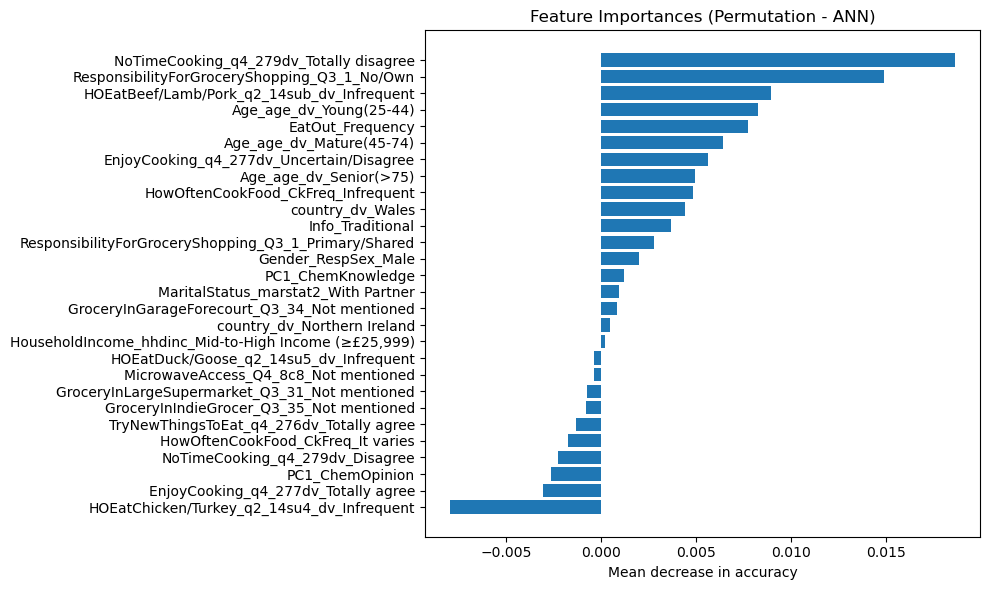

In [82]:
# ANN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Step 2: Prepare data
X = Food_predictive.drop(columns=['RTF_Yearly_Count','RTF_Binary', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5'], errors='ignore')
y = Food_predictive['RTF_Yearly_Count']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop specific insignificant variables (from logistic regression)
columns_to_drop = [
   'PC2_ChemOpinion',
    'Info_Interpersonal',
    'Info_Digital'
]
X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Scale features (important for ANN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and train ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,20), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
y_pred = mlp_model.predict(X_test_scaled)
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Permutation importance
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 10: Show top important features
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)

print("\n Important features (ANN):")
print(importances_df.head(30))

# Step 11: Optional – Plot importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Feature Importances (Permutation - ANN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [83]:
# # export file for viz in tableau
# outputfile = 'Food_Final.csv'
# Food_predictive.to_csv(outputfile,index=False)